# Part A (Analysis of the Given Dataset)

Dataset Description: Titanic Dataset

![](https://cdn.pixabay.com/photo/2021/03/04/16/32/ship-6068668_1280.png)

Data Dictionary:


1.	'Survival': 0 = No, 1 = Yes
2.	'Pclass': Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
3.	'Sex': Sex
4.	'Age': Age in years
5.	'SibSp':  siblings/spouses aboard 
6.	'Parch':  parents/children aboard 
7.	'Ticket': Ticket number
8.	'Fare': Passenger fare
9.	'Cabin': Cabin number
10.	'Embarked': Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


The data has been split into two groups:
1.	training set (train.csv)
2.	test set     (test.csv)

\\
The training set should be used to build your machine-learning models. 

The test set should be used to see how well your model performs on unseen data.







## 1. Provide an overview of the given Dataset including the Dataset Characteristics and Exploratory Data Analysis, data preprocessing and performance of different ML models. This section should be written after completing Part A. 

Given Titanic dataset has splited into two sets: training and testing set.
dshkjhdfiljljelkjklfkjklS

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable (hints: heatmap, groupby, etc) with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need). Note, we will be watching for copy-paste here.

### 2.1 Load, view data and show analysis on data. Be creative. Investigate like a detective.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/303 project/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/303 project/test.csv")
gender_data = pd.read_csv("/content/drive/MyDrive/303 project/gender_submission.csv")

In [ ]:
print(test_data.to_string())
print(gender_data.to_string())

     PassengerId  Pclass                                                             Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0            892       3                                                 Kelly, Mr. James    male  34.50      0      0              330911    7.8292              NaN        Q
1            893       3                                 Wilkes, Mrs. James (Ellen Needs)  female  47.00      1      0              363272    7.0000              NaN        S
2            894       2                                        Myles, Mr. Thomas Francis    male  62.00      0      0              240276    9.6875              NaN        Q
3            895       3                                                 Wirz, Mr. Albert    male  27.00      0      0              315154    8.6625              NaN        S
4            896       3                     Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.00      1      1       

In [ ]:
display('Train Data:',train_data.head(), 'Test Data:',test_data.head(), 'Gender Data:',gender_data.head())

'Train Data:'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Test Data:'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


'Gender Data:'

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
train_data.shape

(891, 12)

In [ ]:
# Merging gender table and test table to dataframe 'gender_test'
left = gender_data
right = test_data

gender_test = pd.merge(left, right, on=["PassengerId"])
gender_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Merging the created dataframe 'gender_test' to the existing dataframe 'train_data'
df = pd.concat([train_data, gender_test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#Show all column names
# Code Here
print(list(df.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
# Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
# Code Here
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB
None


In [ ]:
print(df.describe())

       PassengerId     Survived       Pclass          Age        SibSp  \
count  1309.000000  1309.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000     0.377387     2.294882    29.881138     0.498854   
std     378.020061     0.484918     0.837836    14.413493     1.041658   
min       1.000000     0.000000     1.000000     0.170000     0.000000   
25%     328.000000     0.000000     2.000000    21.000000     0.000000   
50%     655.000000     0.000000     3.000000    28.000000     0.000000   
75%     982.000000     1.000000     3.000000    39.000000     1.000000   
max    1309.000000     1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200  


In [ ]:
# Count rows and coulums
# Code Here
print("Columns = ",df.shape[1])
print("Rows = ",df.shape[0])


Columns =  12
Rows =  1309


In [ ]:
# Total cells in the dataset
# Code Here
print("Total cells in the dataset = ",df.size)

Total cells in the dataset =  15708


### 2.2 Data Cleaning









#### Identifying duplicate values


In [ ]:
# Code Here 
df2=df
df3=df
#duplicate values column wise
df2 = df2.apply(lambda x: x.duplicated()).sum()
print(df2)
#no of duplicate rows in dataset
print("Duplicate rows = ",len(df3)-len(df3.drop_duplicates()))

#duplicate rows
duplicate = df[df.duplicated(keep='first')]
duplicate

PassengerId       0
Survived       1307
Pclass         1306
Name              2
Sex            1307
Age            1210
SibSp          1302
Parch          1301
Ticket          380
Fare           1027
Cabin          1122
Embarked       1305
dtype: int64
Duplicate rows =  0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### Identifying missing values


In [ ]:
# Find the amount of missing values in each column
# Code Here 
missing = df.isnull().sum()
print(missing)
print("Total no of missing values in dataset",df.isnull().sum().sum())
#too many missing values in cabin column we can drop the column as there is no way to fill the values

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64
Total no of missing values in dataset 1280


In [ ]:
# Calculating the percentage of missing values:
#total missing value in percentage
print("Total missing values = {0:.2f} %".format((df.isnull().sum().sum()/df.size)*100))
print((df.isnull().sum()/len(df))*100)

Total missing values = 8.15 %
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64


#### Visualisation of missing data


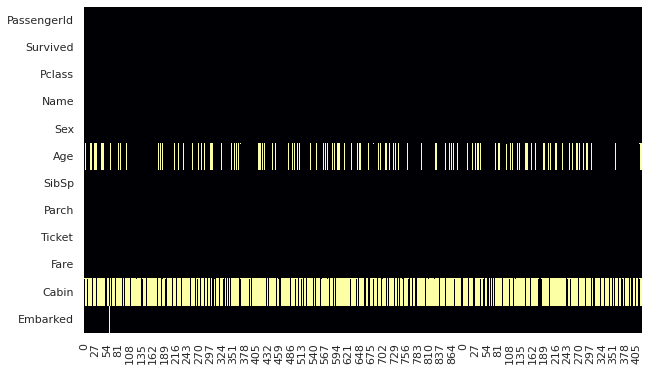

In [ ]:
# Detect missing values
# Visualisation
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap="inferno",cbar_kws={'label': 'Missing Data'},cbar=False)

<Figure size 720x432 with 0 Axes>

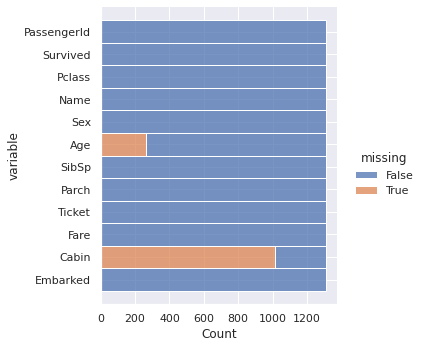

In [ ]:
import missingno as msno
plt.figure(figsize=(10,6))
sns.displot(data=df.isna().melt(value_name="missing"),
            y="variable",hue="missing",multiple="stack"
)

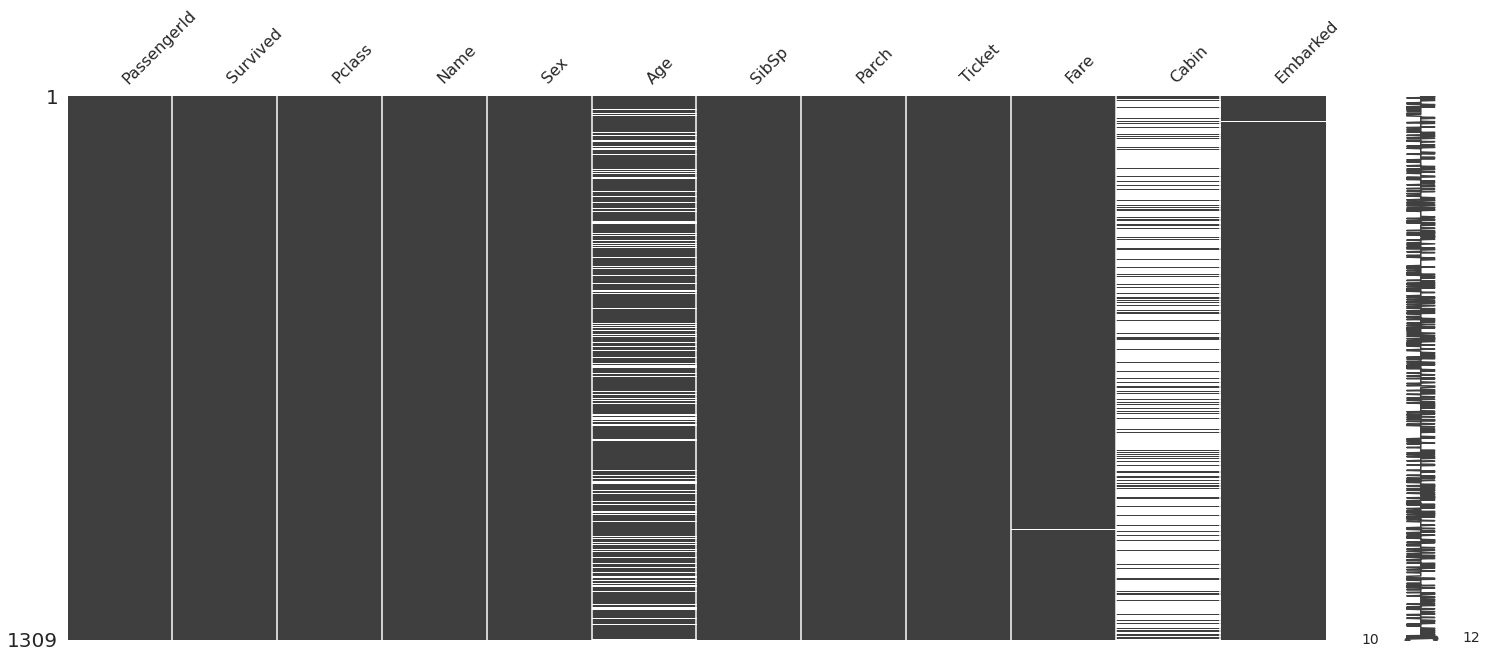

In [ ]:
msno.matrix(df)


#### Dealing with missing values. Fix the missing value problem.



1.   Do analysis using plots. Fix issues.

2.   Provide an appropriate discussion




In [ ]:
# Code Here (Add as many cells as you need)
#Cabin column have the most missing values 77.46% and it cant be replaced by mean/median/mode as its an unique value
#so we decided to drop the column
df.drop("Cabin",axis=1,inplace=True)

In [ ]:
print(list(df.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


,Age,Pclass,SibSp,Fare,Parch,Survived,PassengerId
Age,1.000000,-0.408106,-0.243699,0.178740,-0.150917,-0.053695,0.028814
Pclass,-0.408106,1.000000,0.060832,-0.558629,0.018322,-0.264710,-0.038354
SibSp,-0.243699,0.060832,1.000000,0.160238,0.373587,0.002370,-0.055224
Fare,0.178740,-0.558629,0.160238,1.000000,0.221539,0.233622,0.031428
Parch,-0.150917,0.018322,0.373587,0.221539,1.000000,0.108919,0.008942
Survived,-0.053695,-0.264710,0.002370,0.233622,0.108919,1.000000,-0.020370
PassengerId,0.028814,-0.038354,-0.055224,0.031428,0.008942,-0.020370,1.000000


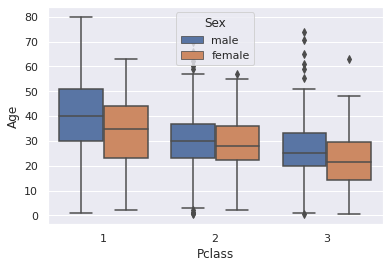

In [ ]:
#the second highest number of missing values in age column
sns.boxplot(x='Pclass',y='Age', hue = 'Sex', data=train_data)
ix = abs(df.corr()).sort_values('Age', ascending=False).index
df_sorted = df.loc[:, ix]
df_sorted.corr()

In [ ]:
age_by_pclass_sex = df.groupby(['Sex', 'Pclass']).median()['Age']
print(age_by_pclass_sex)

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64


In [ ]:
#replacing missing values using median age of pclass by sex
df['Age'].fillna(df.groupby(['Sex', 'Pclass'])['Age'].transform('median'),inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,S


In [ ]:
#next missing column is fare
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [ ]:
fil_fare = df.loc[(df['Pclass'] == 3) & (df['Parch']==0) & (df['SibSp']==0) & (df['Embarked']=='S') & (df['Sex']=='male')]
fil_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S
29,30,0,3,"Todoroff, Mr. Lalio",male,25.0,0,0,349216,7.8958,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,S
45,46,0,3,"Rogers, Mr. William John",male,25.0,0,0,S.C./A.4. 23567,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
386,1278,0,3,"Aronsson, Mr. Ernst Axel Algot",male,24.0,0,0,349911,7.7750,S
398,1290,0,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,S
413,1305,0,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S


In [ ]:
fil_fare['Fare'].median()
df['Fare'] = df['Fare'].fillna(fil_fare['Fare'].median())

In [ ]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
#filling missing values in Embarked column
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
df.groupby(['Fare'])['Survived'].count()
fare_means = df.pivot_table('Embarked', index='Pclass', aggfunc=lambda x: x.mode().iat[0])
fare_means

,Embarked
Pclass,
1,S
2,S
3,S


In [ ]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
missing = df.isnull().sum()
print(missing)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


##### Discuss your findings

The columns in our dataset have missing values are cabin, age, fare and embarked. 


* Cabin: Cabin column has categorical values and has the highest percentage of missing values (77.46%). We concluded from our analysis that cabin does not have much significance in this dataset. We can remove this column without having to replace the missing value. This, we believe, is the best solution for this column.

* Age: We generated a column correlation visualization for the age column. 
According to the table, only the Pclass column is highly negatively correlated with the age column. Highly negative correlation indicates that pclass will decline as age rises.
Then we boxplot age (by sex) and Pclass. The majority of people in the first Pclass are between the ages of 30 and 53. The age decreased as Pclass progressed to 2nd (25-35). 
As a result, we will use Pclass groupby sex to fill in the missing values in the age column.
The second and third Pclasses have outilers. As a result, if we fix the age with mean values, the value will be incorrectly inserted because mean is bothered by outliers. 
That is why we decided to use median values.

* Fare: In the fare column, there is one missing value. As the missing column belongs to a lower-class male traveler who embraked from Southampton without a family member, we decided to look for any connections between those columns and the fare column. There were multiple fares offered with all of these features. So we choose the median to fill in the missing value because mean is bothered by outliers and mode may not be the best choice because what if this person paid less than that.

* Embarked: There are two missing values in Embarked. Both entries have upper class female passengers and similar ticket numbers, indicating that they left from the same port. The value of embarked is categorical. So we looked at which ports had the most passengers boarding. The results showed that upper-class passengers boarded the most from Southampton. As a result, we used S to fill in the blanks (Southampton).



### 2.3 Analysing Patterns using Visualisations

The data type of 'Sex' is an object, which will not be visible in a correlation. So, if we like to include the values of the column 'Sex' into the correlation matrix by creating a new column 'Sex_Number' and set the value 'female' to '1' and 'male' to '0'. 

In [ ]:
# Creating a new column 'SexNo' with the values '1' for 'female' and '0' for 'male'
df['Sex_Number'] = np.where((df['Sex'] == "female"), 1, 0)
# Checking if the column 'SexNo' has been added
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### 2.3.1 Visualization of column correlation (use groupby). Also, plot Heat Map

In [ ]:
# Correlation table including the new column 'SexNo'
correlation = df.corr()
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Number
PassengerId,1.000000,-0.020370,-0.038354,0.028814,-0.055224,0.008942,0.031428,-0.013406
Survived,-0.020370,1.000000,-0.264710,-0.053695,0.002370,0.108919,0.233622,0.688371
Pclass,-0.038354,-0.264710,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.124617
Age,0.028814,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.063645
SibSp,-0.055224,0.002370,0.060832,-0.243699,1.000000,0.373587,0.160238,0.109609
Parch,0.008942,0.108919,0.018322,-0.150917,0.373587,1.000000,0.221539,0.213125
Fare,0.031428,0.233622,-0.558629,0.178740,0.160238,0.221539,1.000000,0.185523
Sex_Number,-0.013406,0.688371,-0.124617,-0.063645,0.109609,0.213125,0.185523,1.000000


Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

**seaborn.heatmap**

Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

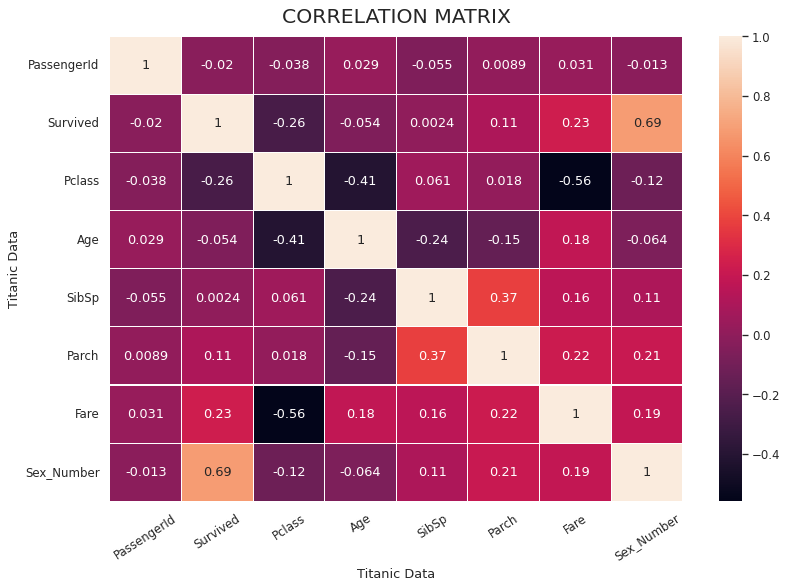

In [ ]:
#@title Default title text
# Visualisation of the corralation table


plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.xticks(rotation=33)
plt.show()

What do you undersend/find from the analysis above (section 2.3.1)? Write in your own words in this cell.

Write below:

The number in correlation varies from -1 to +1 to represent how well the two columns relates with each other.  1 means that there is a 1 to 1 relationship (a perfect correlation). Same columns have correlation value 1. 

From the Correlation Matrix it is easily observant that Sex_number has highly positive correlation with Survived column (0.69) and vice versa. It means if one goes up the other will probably go up. Parch and SipSP columns also have positive relation (0.37) which mean if one goes up, other will sightly go up.

On the other hand, Pclass and Fare column is highly negatively correlated (-0.56) means when one will go up other will probably go down. Then, Age and Pclass is also negatively correlated in our dataset (-0.41).

The above relations are most effective correlation in our dataset. All the other columns have more or less positive or negative relation which is not that effective in the dataset. 


#### 2.3.2 Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



##### 2.3.2.1 Sex Proportion

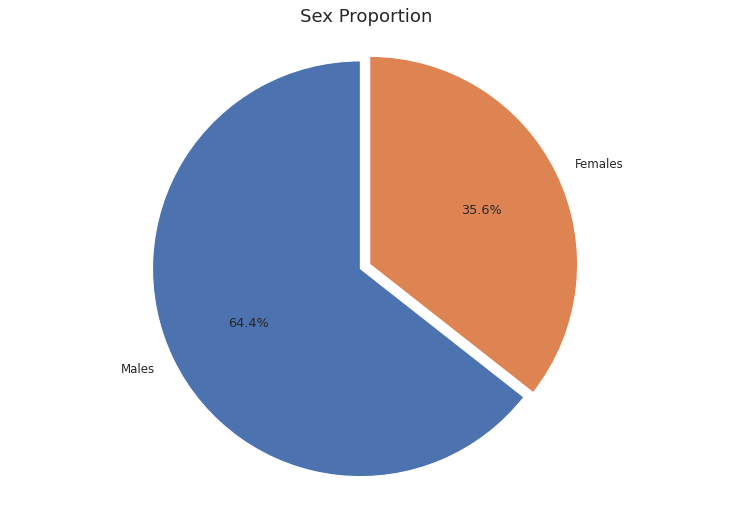

[843, 466]


In [ ]:
male = (df['Sex'] == 'male').sum()
female = (df['Sex']== 'female').sum()
proportions = [male,female]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()
print(proportions)

 What do you undersend/find from the analysis above (section 2.3.2.1)? Write in your own words in this cell.

Write below:
This pie chart from the Titanic dataset shows that the proportion of male and female passengers is 64.4% and 35.6%, respectively, in the sex column.In this dataset, there are 843 male and 466 female passengers.


##### 2.3.2.2 Age comparision of the people who survived and those who died

In [ ]:
# How many people survived ('Survived' == 0)
survived_data=df.Survived.value_counts().to_frame()
survived_data

,Survived
0,815
1,494


In [ ]:
pd.pivot_table(df, index="Survived", values=['Pclass','SibSp', 'Parch', 'Fare'])

,Fare,Parch,Pclass,SibSp
Survived,,,,
0,23.879124,0.311656,2.467485,0.496933
1,48.811497,0.506073,2.010121,0.502024


In [ ]:
# Amount and average age of people who survived compared to those who died.
df.groupby(['Survived']).Age.agg([len,min, max,'mean', 'median'])

,len,min,max,mean,median
Survived,,,,,
0,815,0.33,74.0,30.510986,28.0
1,494,0.17,80.0,28.931079,28.0


In [ ]:
fem_p1_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
fem_p1_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
fem_p1_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
fem_p1_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
fem_p2_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
fem_p2_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
fem_p2_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
fem_p2_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 3)].Age.median()
fem_p3_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
fem_p3_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
fem_p3_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
fem_p3_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
fem_p3_s4 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
fem_p3_s5 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
fem_p3_s8 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()
male_p1_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
male_p1_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
male_p1_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
male_p1_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
male_p2_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
male_p2_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
male_p2_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
male_p3_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
male_p3_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
male_p3_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
male_p3_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
male_p3_s4 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
male_p3_s5 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
male_p3_s6 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 6)].Age.median()
male_p3_s8 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()

# Filling missing values with average age of women and men in each class
def myfunc(age, pclass, sex, SibSp):
    if pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 0:
        age=fem_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 1:
        age=fem_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 2:
        age=fem_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 3:
        age=fem_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 0:
        age=fem_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 1:
        age=fem_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 2:
        age=fem_p2_s2
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 3:
        age=fem_p2_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 0:
        age=fem_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 1:
        age=fem_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 2:
        age=fem_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 3:
        age=fem_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 4:
        age=fem_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 5:
        age=fem_p3_s5  
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 8:
        age=df.Age.median()  
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 0:
        age=male_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 1:
        age=male_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 2:
        age=male_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 3:
        age=male_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 0:
        age=male_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 1:
        age=male_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 2:
        age=male_p2_s2   
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 0:
        age=male_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 1:
        age=male_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 2:
        age=male_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 3:
        age=male_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 4:
        age=male_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 5:
        age=male_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 6:
        age=male_p3_s6
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 8:
        age=male_p3_s8 
    else:
        age=age
    return age

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
# Creating a new columns 'Age_Filled_Na' with the new average age values 
df['Age_Filled'] = df.apply(lambda x: myfunc(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

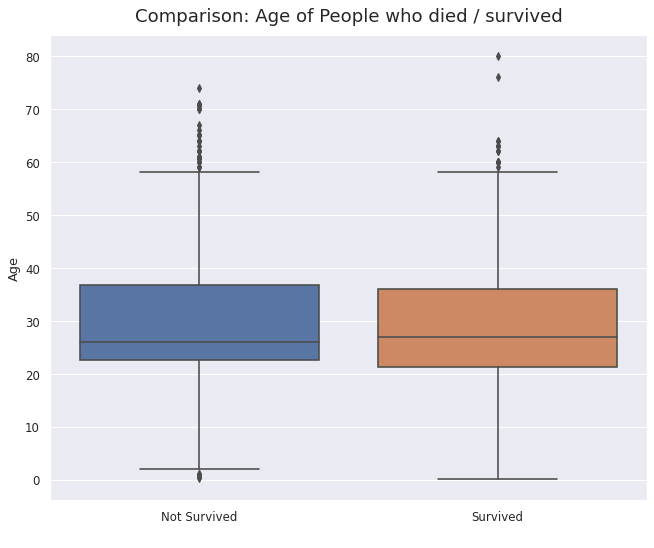

In [ ]:
# Age comparision of the people who survived and those who died using a boxplot. 
plt.figure(figsize=(10,8), dpi=77)
sns.boxplot(x="Survived", y="Age_Filled", data=df)
plt.title("Comparison: Age of People who died / survived", size=17, pad=13)
plt.ylabel('Age')
plt.xlabel(' ')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.2)? Write in your own words in this cell.

Write below:
In Barplot we can visualize min max quartiles and outliers in one frame.

The minimun age that survived is 


##### 2.3.2.3 The barplot compares the survival 

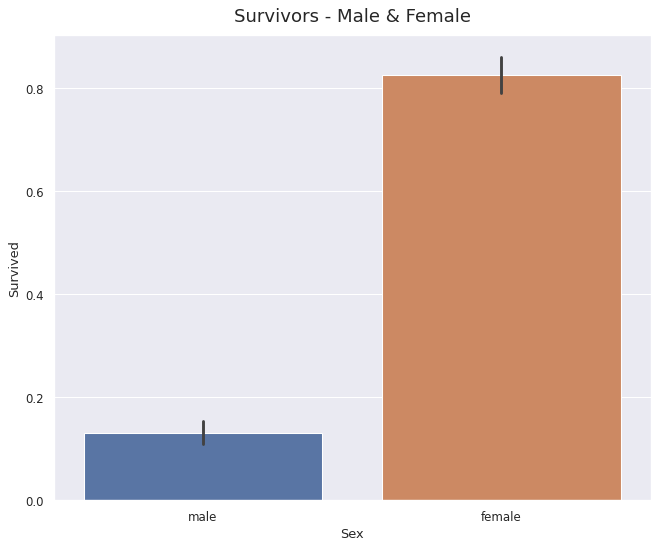

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survivors - Male & Female", size=17, pad=13 )
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.3)? Write in your own words in this cell.

Write below:
From this bar plot, we see that only 18% of males survived, compared to 82% of female survivors.Female passengers had much higher survival ratio than men

##### 2.3.2.4 Comparison: Survivors - Male & Female

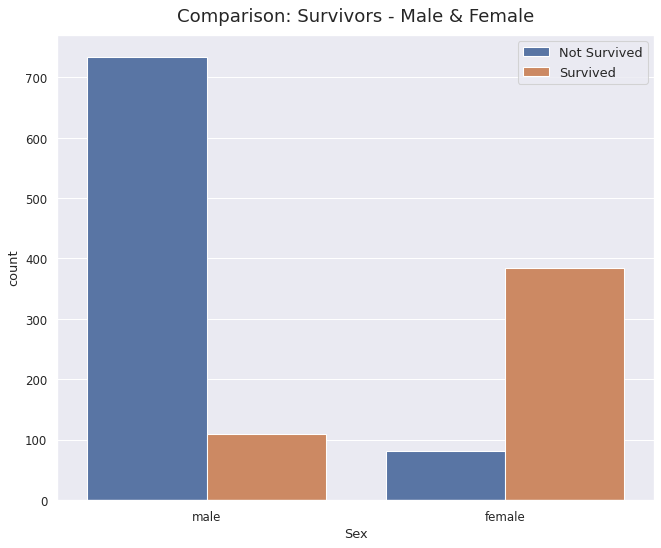

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title("Comparison: Survivors - Male & Female", size=17, pad= 13)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.4)? Write in your own words in this cell.

Write below:
According to the bar plot on the survival of passengers on the Titanic, there were 466 female passengers; 380 survived and 154 died. There were 843 male passengers: 142 survived and 709 died. Compared to men,female passengers had a much higher survival rate.

In [ ]:
# Find percentage of women who survived
tot_fem = len(df[df['Sex']=='female'])
tot_male = len(df[df['Sex']=='male'])
tot_sur_male =  len(df[(df['Survived']==1)&(df['Sex']=='male')])
tot_sur_female = len(df[(df['Survived']==1)&(df['Sex']=='female')])
print("Women survived = {0:.2f} %".format((tot_sur_female/tot_fem)*100))


Women survived = 82.62 %


In [ ]:
# Find percentage of men who survived
print("Men survived = {0:.2f} %".format((tot_sur_male/tot_male)*100))

Men survived = 12.93 %


##### 2.3.2.5 Compares the chance of survival for each ticket class

In [ ]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [ ]:
df.groupby(['Pclass', 'Survived']).Age.agg([len])

len
Pclass Survived     
1      0         137
       1         186
2      0         160
       1         117
3      0         518
       1         191

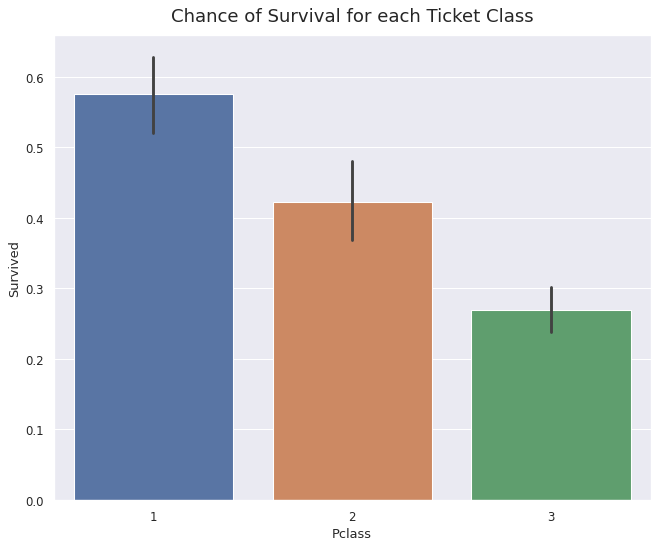

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Chance of Survival for each Ticket Class", size=17, pad=13)
plt.show()

In [ ]:
# Survived and not survived compared for each ticket class
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.title("Comparison: Survivors - Ticket Class", size=17, pad=13)
plt.legend(['Not Survived', 'Survived'], loc='upper left', prop={'size': 12})
plt.show()

NameError: ignored

 What do you undersend/find from the analysis above (section 2.3.2.5)? Write in your own words in this cell.

Write below:
The bar plot above clearly shows unequivocally how important passenger’s class was to the Titanic passengers' likelihood of surviving.We can see that the number of passengers in the third class was greater than the sum of those in the first and second classes. Among 1st class passenger’s 58% of passengers survived.The survival rate for 2nd class passengers was 42%. Only 28% of the 3rd class passengers survived.First class passengers had a much higher chance of survival than passengers in third class.

##### 2.3.2.6 Chance of Survival for Passengers with Parents or Children

In [ ]:
# Amount and average age of women and man of each class who survived compared to those who died.
df.groupby(['Sex','Survived', 'Pclass']).Age.agg([len,min, max,'mean'])

len    min   max       mean
Sex    Survived Pclass                             
female 0        1         3   2.00  50.0  25.666667
                2         6  24.00  57.0  36.000000
                3        72   2.00  48.0  23.818182
       1        1       141  14.00  76.0  37.300000
                2       100   0.92  60.0  26.973402
                3       144   0.17  63.0  21.259485
male   0        1       134   6.00  71.0  42.752252
                2       154   2.00  70.0  32.367133
                3       446   0.33  74.0  26.412894
       1        1        45   0.92  80.0  36.248000
                2        17   0.67  62.0  16.022000
                3        47   0.42  45.0  22.274211

In [ ]:
df['Parch'].value_counts().to_frame()

,Parch
0,1002
1,170
2,113
3,8
5,6
4,6
6,2
9,2


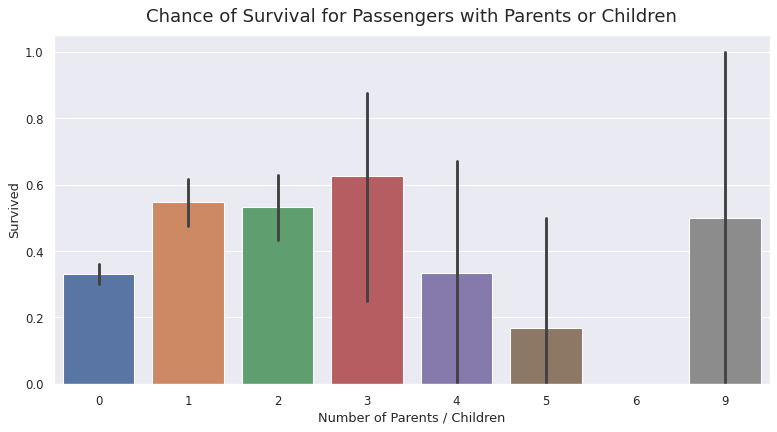

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Parents or Children", size=17, pad=13)
plt.xlabel('Number of Parents / Children')
plt.show()

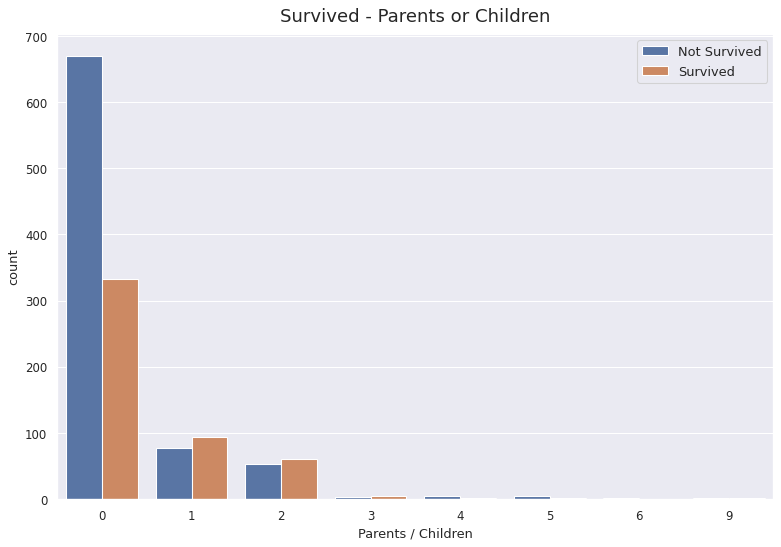

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.title("Survived - Parents or Children", size=17, pad=12)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xlabel('Parents / Children')
plt.show()

In [ ]:
# Age of people with parents or children
df.groupby(['Parch','Survived']).Age.agg([len, min, max])

len    min   max
Parch Survived                  
0     0         670  11.00  74.0
      1         332   5.00  80.0
1     0          77   0.75  70.0
      1          93   0.42  64.0
2     0          53   0.33  58.0
      1          60   0.17  64.0
3     0           3  16.00  61.0
      1           5  24.00  54.0
4     0           4  29.00  64.0
      1           2  60.00  60.0
5     0           5  39.00  41.0
      1           1  38.00  38.0
6     0           2  40.00  43.0
9     0           1    NaN   NaN
      1           1    NaN   NaN

 What do you undersend/find from the analysis above (section 2.3.2.6)? Write in your own words in this cell.

Write below:

##### 2.3.2.7 This barplot compares the chance of survival within a category

In [ ]:
df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [ ]:
df.groupby(['SibSp','Survived']).Age.agg([len, 'mean'])

len       mean
SibSp Survived                
0     0         593  31.603537
      1         298  29.689549
1     0         153  33.509398
      1         166  28.840204
2     0          23  23.950000
      1          19  23.093750
3     0          15  11.181818
      1           5  27.600000
4     0          18   7.222222
      1           4  15.750000
5     0           5  10.200000
      1           1  10.000000
8     0           8  14.500000
      1           1        NaN

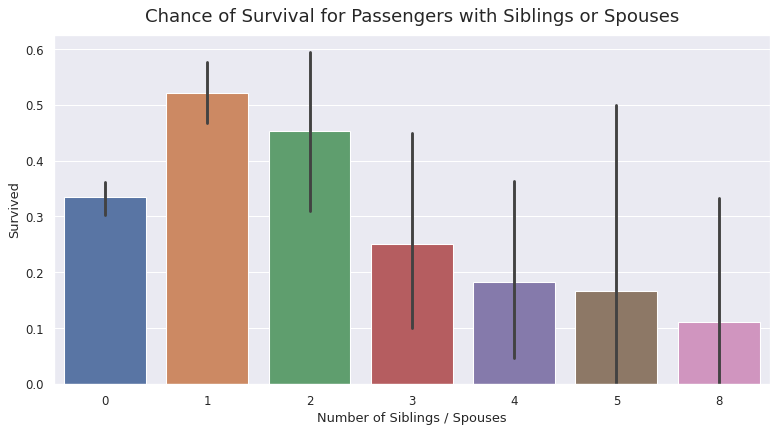

In [ ]:
# This barplot compares the chance of survival within a category
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Siblings or Spouses", size=17, pad=13)
plt.xlabel('Number of Siblings / Spouses')
plt.show()

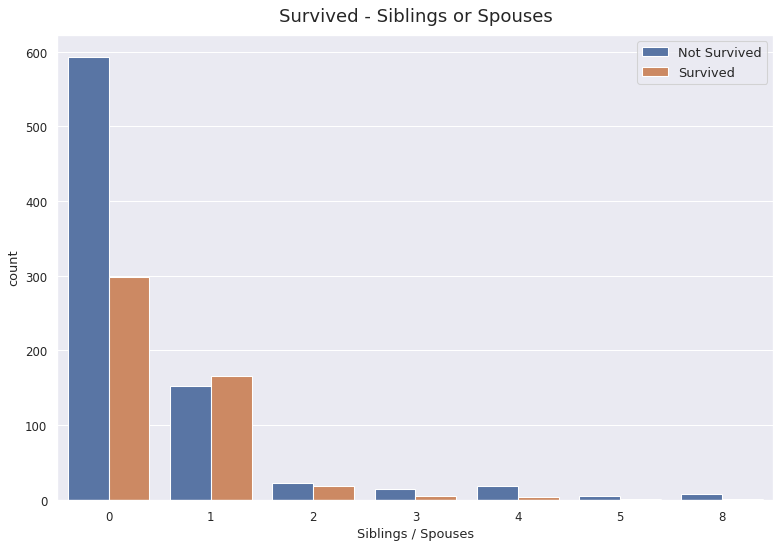

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.title("Survived - Siblings or Spouses", size=17, pad=13)
plt.xlabel('Siblings / Spouses')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

In [ ]:
df.groupby(['SibSp','Survived']).Age.agg([len, min, max, 'mean'])

len    min   max       mean
SibSp Survived                             
0     0         593   0.33  74.0  31.603537
      1         298   0.42  80.0  29.689549
1     0         153   0.75  70.0  33.509398
      1         166   0.17  76.0  28.840204
2     0          23   9.00  44.0  23.950000
      1          19   0.75  59.0  23.093750
3     0          15   2.00  31.0  11.181818
      1           5  23.00  33.0  27.600000
4     0          18   1.00  16.0   7.222222
      1           4   3.00  38.0  15.750000
5     0           5   1.00  16.0  10.200000
      1           1  10.00  10.0  10.000000
8     0           8  14.50  14.5  14.500000
      1           1    NaN   NaN        NaN

 What do you undersend/find from the analysis above (section 2.3.2.7)? Write in your own words in this cell.

Write below:

##### 2.3.2.8 Chance of Survival by Port of Embarkation

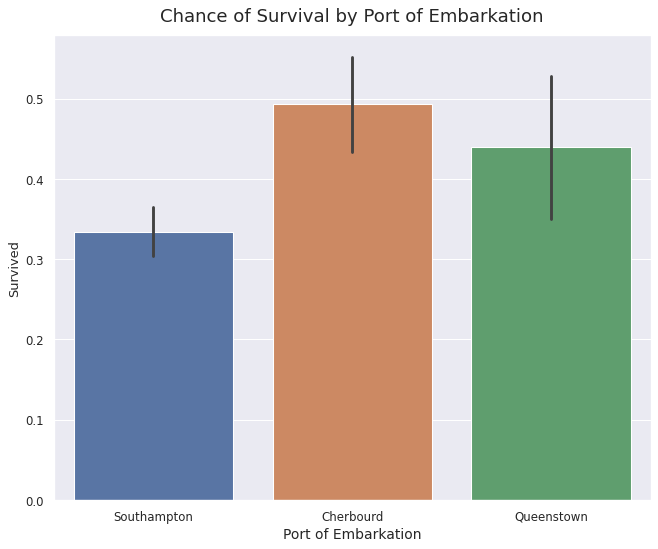

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title('Chance of Survival by Port of Embarkation', size=17, pad=13)
plt.xlabel('Port of Embarkation', size=13)
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

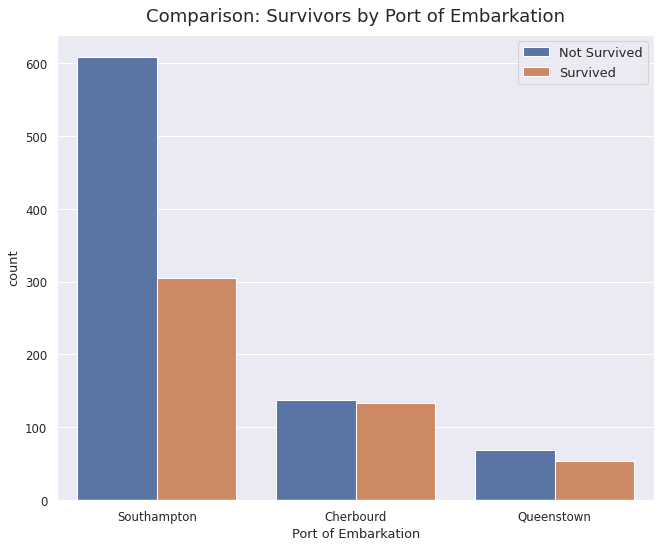

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Embarked'],hue=df['Survived'])
plt.title("Comparison: Survivors by Port of Embarkation", size=17, pad=13)
plt.xlabel('Port of Embarkation')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.8)? Write in your own words in this cell.

Write below:
From this bar plot, we see most of the passengers embarked from the port ‘Southampton’, and the rest from the port ‘Queenstown’ and ‘Cherbourg’.The bar plot above shows port of embarkment seems to have had an impact on the survival, where ‘Cherbourg’ had the highest survival rate of over 48%.

##### 2.3.2.9 Average Age of Passengers with Siblings and  Parents or Children

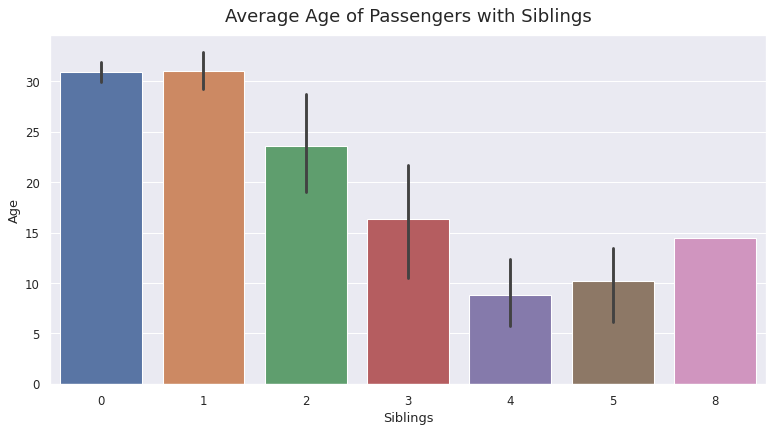

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Age", data=df)
plt.title('Average Age of Passengers with Siblings', size=17, pad=13)
plt.xlabel('Siblings')
plt.show()

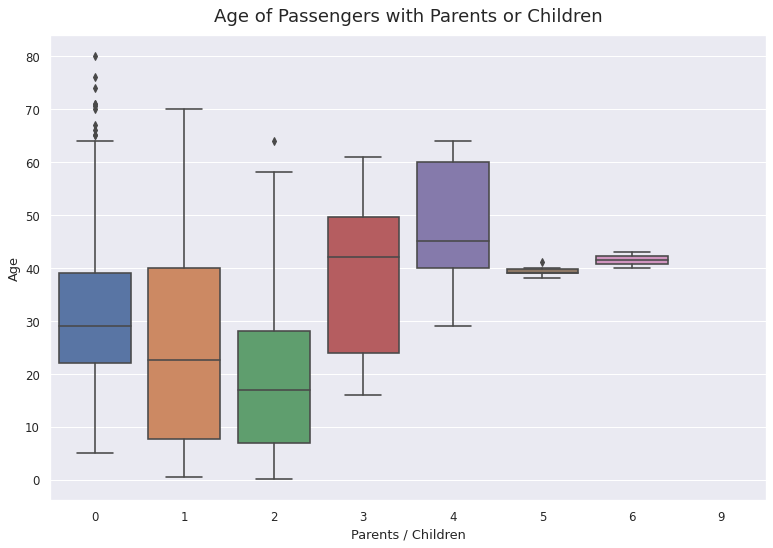

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.boxplot(x="Parch", y="Age", data=df)
plt.title('Age of Passengers with Parents or Children', size=17, pad=13)
plt.xlabel('Parents / Children')
plt.show()

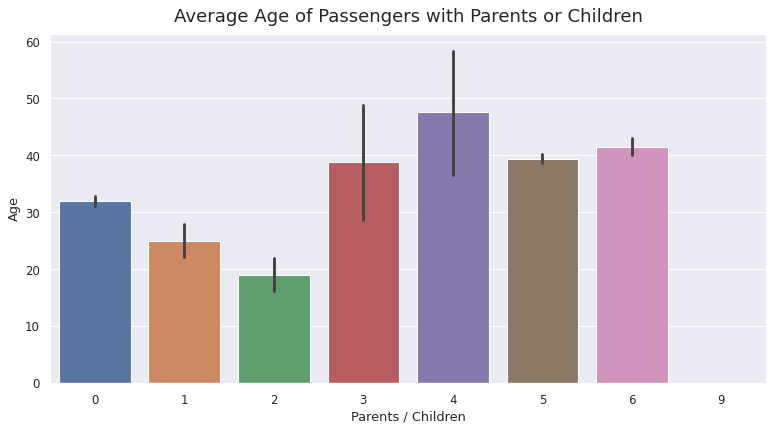

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Age", data=df)
plt.title('Average Age of Passengers with Parents or Children', size=17, pad=12)
plt.xlabel('Parents / Children')
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.9)? Write in your own words in this cell.

Write below:
From above two bar plots, we can see that the average age of passengers who hadn’t any siblings or any parents or children was 32 y/o, the average age of passengers who had 1 siblings or   parents/children was 32 y/o and 25 y/o, the average age of passengers 23 y/o who had 2 siblings and 18 y/o who had 2 parents or children, the average age of passengers who had 3 siblings or parents/children was 16 y/o and 38 y/o, the average age of passengers 8 y/o who had 4 siblings and 48 y/o who had 4 parents or children, the average age of passengers who had 5 siblings or parents/children was 10 y/o and 39 y/o, the average age of passengers 14 y/o who had 6 siblings and 41 y/o who had 6 parents or children

From this above box plot, we see that the median age of passengers without parents or children is 29 years old; 22 years old with one parent or child; 18 years old with two parents or children; 41 years old with three parents or children; 45 years old with four parents or children; 39 years old with five parents or children; and 42 years old with six parents or children. The minimum and maximum age of passengers who had no parents or children ranged from 5 to 64 years old, had 1 parent or child ranged from 0 to 70 years old, had 2 parents or children ranged from 0 to 58 years old, had 3 parents or children ranged from 15 to 61 years old, had 4 parents or children ranged from 29 to 64 years old, had 5 parents or children ranged from 38 to 40 years old, and had 6 parents or children ranged from 40 to 44 years old. 90% of the data lies between the lower and upper whiskers. Data outside the maximum and minimum bars are outliers.

##### 2.3.2.10 Age of Passengers for each Ticket Class

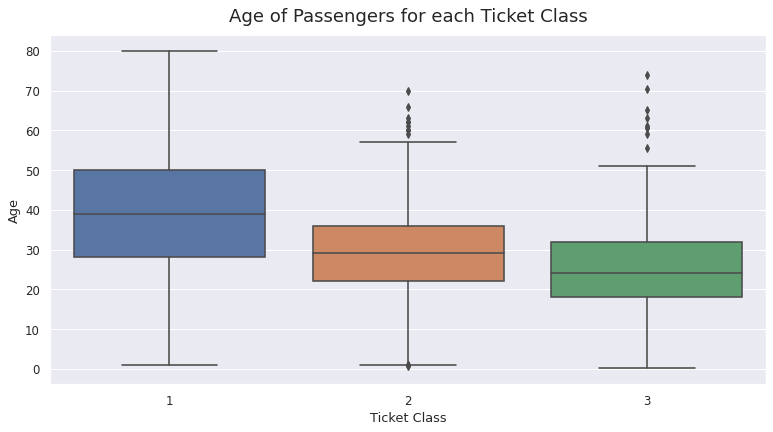

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title('Age of Passengers for each Ticket Class', size=17, pad=13)
plt.xlabel('Ticket Class')
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.10)? Write in your own words in this cell.

Write below:
From this above box plot we can visualize min max quartiles and outliers in one frame.

The median age of first-class passengers is 39 years old, 29 years old for second-class passengers, and 25 years old for third-class passengers.The quartile range Q1 and Q3 in 1st class are 29 and 50 years old, which means 68% of passengers in this age range purchased a first class ticket. Q1 and Q3 in 2nd class are 22 and 36 years old, respectively, meaning 68% of passengers in this age range purchased a second class ticket. Q1 and Q3 in 3rd class are 18 and 32 years old, meaning 68% of passengers in this age range purchased a 3rd class ticket. A first-class ticket's minimum and maximum age ranges from 1 to 80 years old; a second-class ticket ranges from 1 to 58 years old; and a third-class ticket ranges from 0 to 51 years old.90% of the data lies between the lower and upper whiskers.Data outside the maximum and minimum bars are outliers.

##### 2.3.2.11 Comparing multiple columns

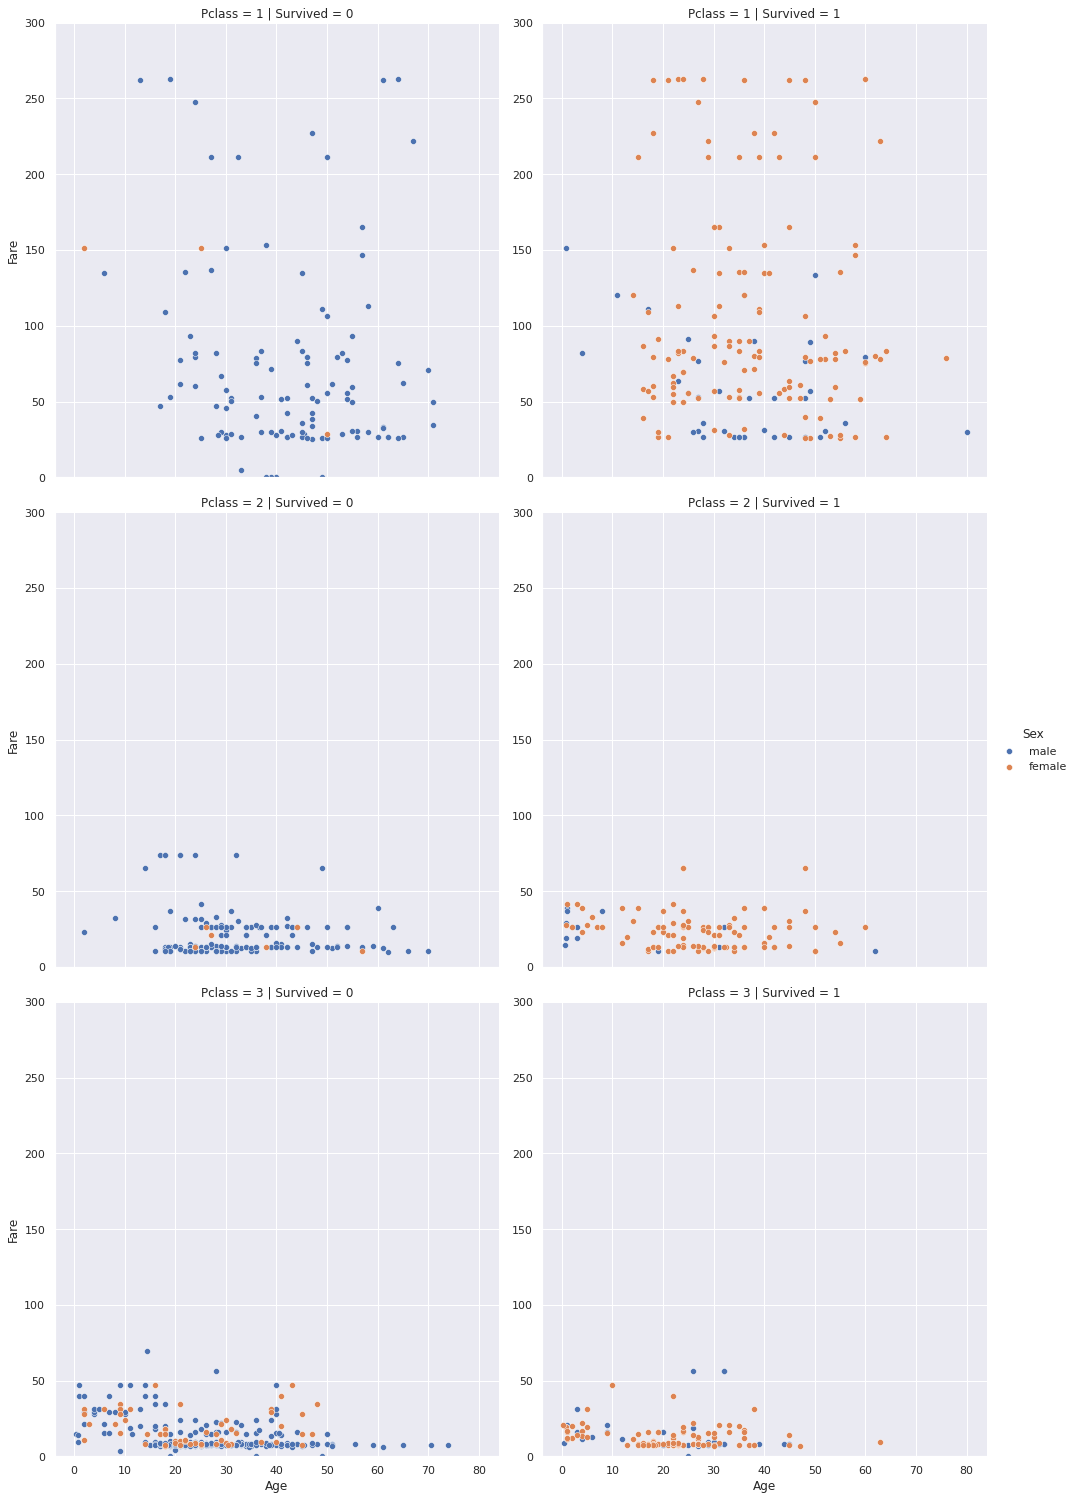

In [ ]:
# Comparison of Pclass, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='Pclass', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

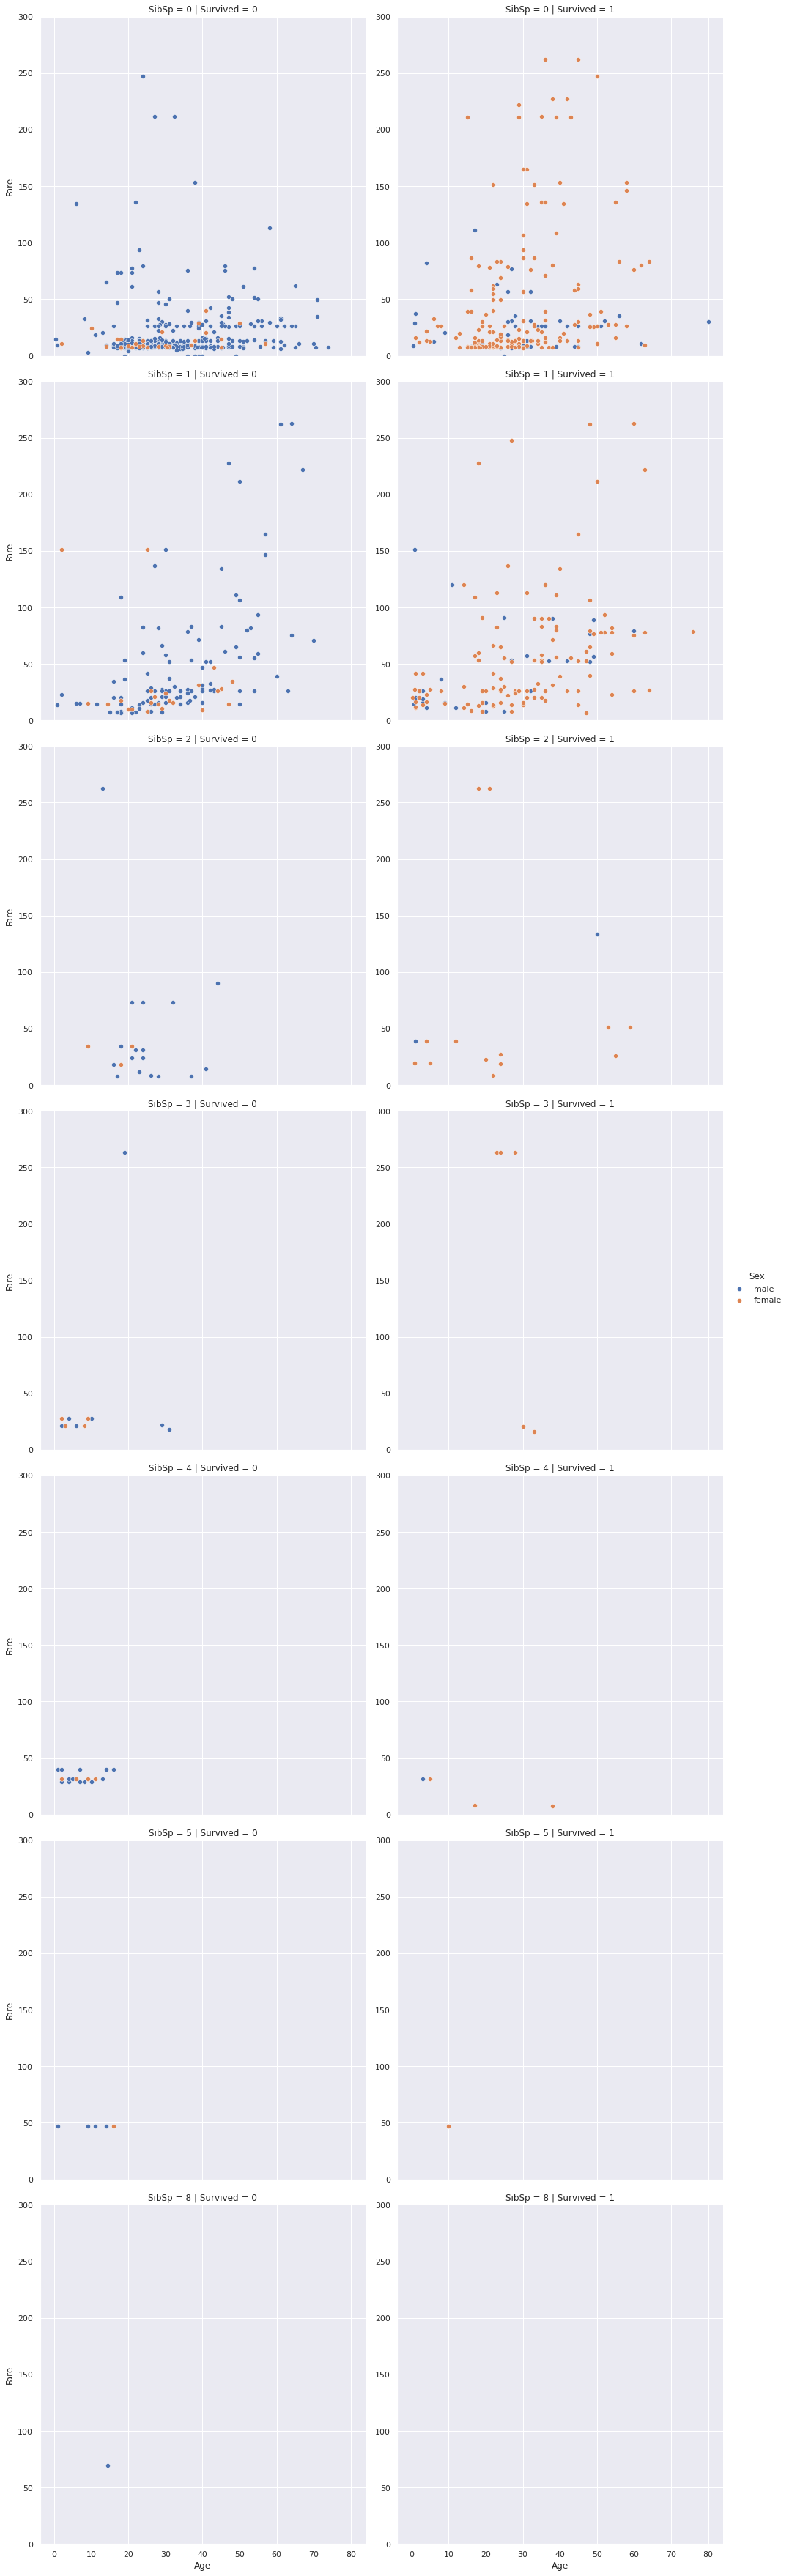

In [ ]:
# Comparison of Parch, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='SibSp', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

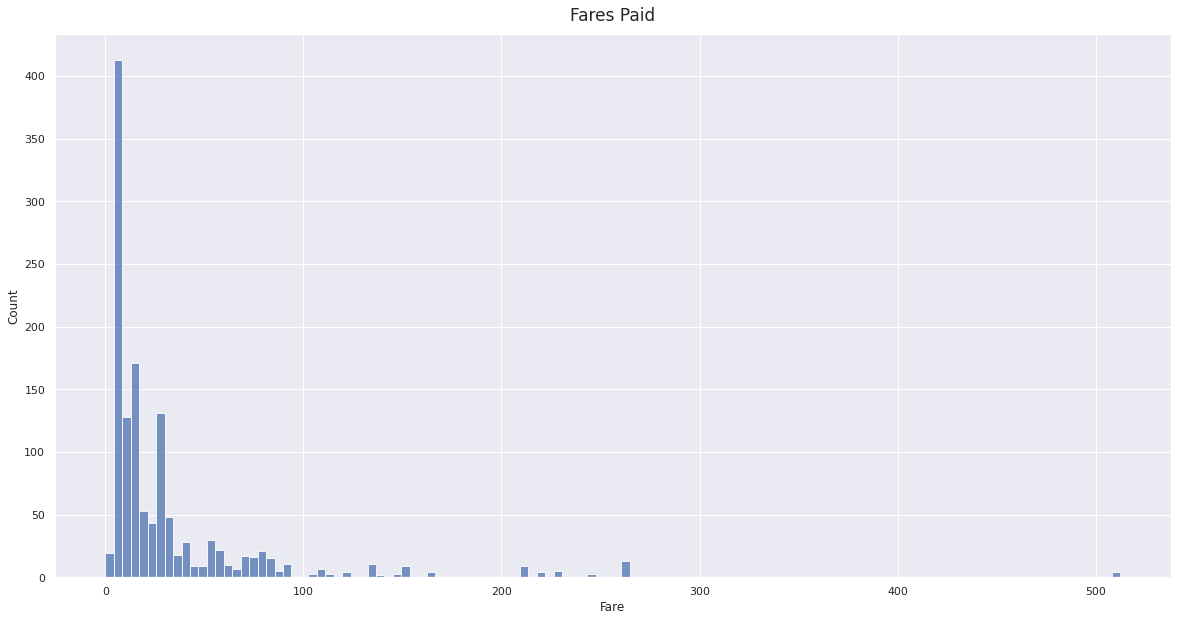

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare)
plt.title('Fares Paid', size=17, pad=13)
plt.show()

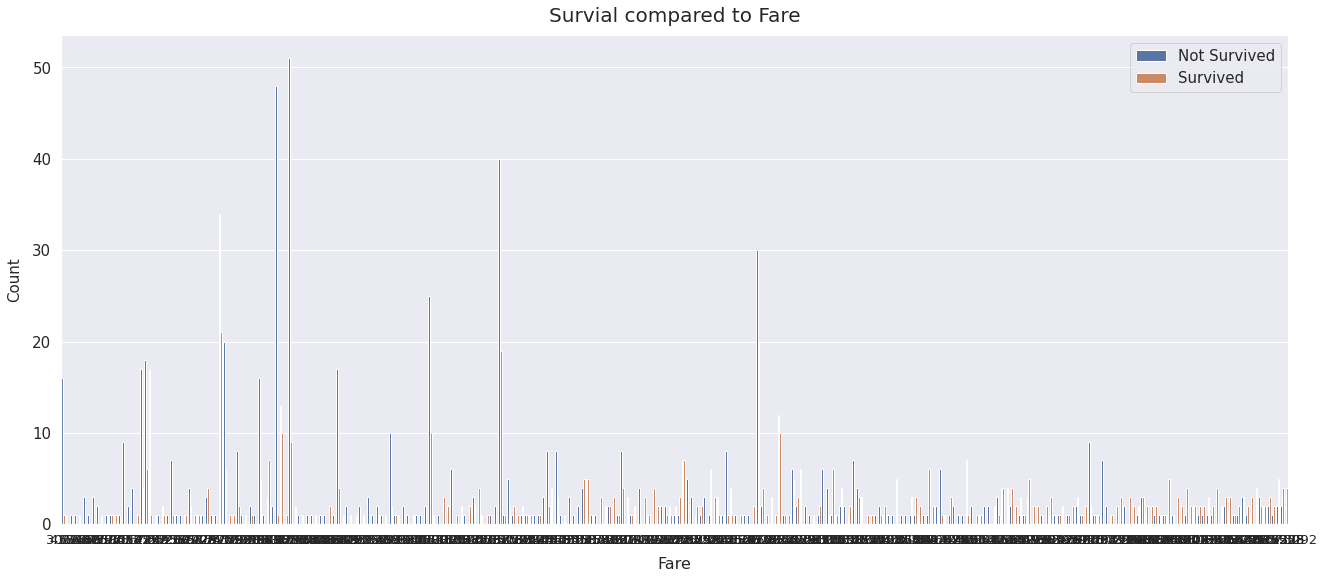

In [ ]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df)
plt.xlabel('Fare', size=16, labelpad=10)
plt.ylabel('Count', size=15, labelpad=10)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survial compared to Fare', size=20, y=1, pad=13)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.11)? Write in your own words in this cell.

Write below:
The first four plot shows Comparing age, sex, survival the counts of passengers of “not survived” and “survived” on the basis of age group on x-axis and fare amount in y-axis.

From Pclass 1 female passengers survived the most comparing male passengers.Most data are gathered within age range 20-60 paid fare in 30-110.
Pclass2 plots shows that male passengers died the most than female passengers.  Most data of “Not survived” and “survived” range of fare lies in between 10-40. Male passenger died in age range of 15-60 and female passengers who survived are in 0-50 age range. In Pclass3 almost similar count of male and female died the most data is in 5-45 fare range.So, we get that, female passengers of all of the Pclass survived more than male passengers which means in the survival phase female passengers had the priority.

From the SipSb plots we get to the point that age range 20-50 female passengers survived in a large count comparing to the male passengers.

From Fare paid hist plot, we can see that it shows the counts of passengers based on the fare amount. Fares varied significantly, with few passengers paying as much as $512. Most of the passengers paid 5 to 50 dollars for their tickets.


## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

For encoding categorical variables you can use pandas (get_dummies).

Convert categorical variable into dummy/indicator variables.

Learn More:


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

**Examples**


In [ ]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train1 = train_data.copy()


train1.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)


train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data1 = train1.copy()

data1["Sex"] = data1["Sex"].astype('category')
data1["Sex"] = data1["Sex"].cat.codes
#male 1 female 0

data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


**Now use the given dataset and perform the data preprocessing steps:**

In [ ]:
# Code Here (Add as many cells as you need)
print(data1.shape)
df2 = data1.apply(lambda x: x.duplicated()).sum()
print(df2)
#no of duplicate rows 
print("Duplicate rows = ",len(data1)-len(data1.drop_duplicates()))
#duplicate rows
data1.drop_duplicates(keep='first', inplace=True)
print("Duplicate rows = ",len(data1)-len(data1.drop_duplicates()))

(891, 8)
Survived    889
Pclass      888
Sex         889
Age         802
SibSp       884
Parch       884
Fare        643
Embarked    887
dtype: int64
Duplicate rows =  111
Duplicate rows =  0


In [ ]:
#missing values
missing = data1.isnull().sum()
print(missing)
print("Total no of missing values in dataset",data1.isnull().sum().sum())

Survived      0
Pclass        0
Sex           0
Age         104
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Total no of missing values in dataset 106


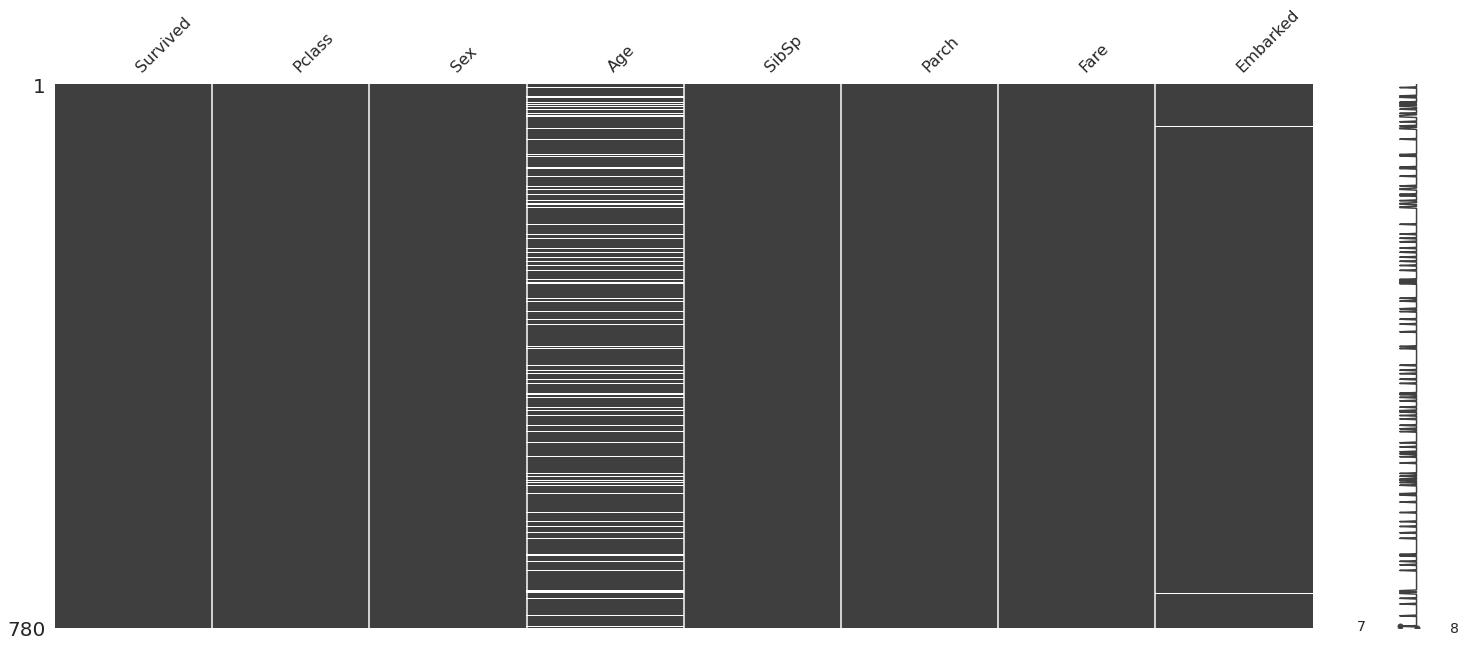

In [ ]:
msno.matrix(data1)

In [ ]:
ix = abs(data1.corr()).sort_values('Age', ascending=False).index
data1_sorted = data1.loc[:, ix]
data1_sorted.corr()

,Age,Pclass,SibSp,Parch,Sex,Fare,Survived
Age,1.000000,-0.366477,-0.314239,-0.193819,0.100378,0.093877,-0.084985
Pclass,-0.366477,1.000000,0.086788,0.038975,0.117507,-0.552440,-0.336244
SibSp,-0.314239,0.086788,1.000000,0.380596,-0.097959,0.134127,-0.037597
Parch,-0.193819,0.038975,0.380596,1.000000,-0.236962,0.191055,0.069669
Sex,0.100378,0.117507,-0.097959,-0.236962,1.000000,-0.169307,-0.513615
Fare,0.093877,-0.552440,0.134127,0.191055,-0.169307,1.000000,0.246669
Survived,-0.084985,-0.336244,-0.037597,0.069669,-0.513615,0.246669,1.000000


In [ ]:
age_by_pclass_sex = data1.groupby(['Sex', 'Pclass','SibSp']).median()['Age']
print(age_by_pclass_sex)

Sex  Pclass  SibSp
0    1       0        32.0
             1        37.0
             2        21.0
             3        23.5
     2       0        30.0
             1        27.0
             2        24.0
             3        30.0
     3       0        22.0
             1        28.5
             2         9.0
             3         8.0
             4         7.5
             5        16.0
             8         NaN
1    1       0        40.0
             1        38.0
             2        47.0
             3        19.0
     2       0        31.0
             1        30.5
             2        23.0
     3       0        27.0
             1        25.0
             2        27.0
             3         4.0
             4         5.5
             5        10.0
             8         NaN
Name: Age, dtype: float64


In [ ]:
age_by_pclass_sex = data1.groupby(['Sex', 'Pclass']).median()['Age']
age_by_pclass_sex_mean = data1.groupby(['Sex', 'Pclass']).mean()['Age']

print(age_by_pclass_sex)
print(age_by_pclass_sex_mean)

Sex  Pclass
0    1         35.0
     2         28.0
     3         22.0
1    1         40.0
     2         30.5
     3         25.0
Name: Age, dtype: float64
Sex  Pclass
0    1         34.738095
     2         28.321429
     3         21.957921
1    1         41.074200
     2         31.083295
     3         26.576910
Name: Age, dtype: float64


In [ ]:
data1['Age'].fillna(data1.groupby(['Sex', 'Pclass'])['Age'].transform('median'),inplace=True)


In [ ]:
data1[data1['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [ ]:
missing = data1.isnull().sum()
print(missing)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


In [ ]:
data1[data1['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,0,38.0,0,0,80.0,NaN
829,1,1,0,62.0,0,0,80.0,NaN


In [ ]:
data1['Embarked'].fillna(data1['Embarked'].mode()[0],inplace=True)

In [ ]:
missing = data1.isnull().sum()
print(missing)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [ ]:
data1['Embarked'].value_counts()

S    567
C    155
Q     58
Name: Embarked, dtype: int64

In [ ]:
data1["Embarked"] = data1["Embarked"].astype('category')
data1["Embarked"] = data1["Embarked"].cat.codes

In [ ]:
data1['Embarked'].value_counts()
#s=2, c=0, q=1

2    567
0    155
1     58
Name: Embarked, dtype: int64

In [ ]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test1 = test_data.copy()

In [ ]:
test1.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
test1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
test1.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
ix = abs(test1.corr()).sort_values('Age', ascending=False).index
data1_sorted = test1.loc[:, ix]
data1_sorted.corr()

,Age,Pclass,Fare,SibSp,Parch
Age,1.000000,-0.492143,0.337932,-0.091587,-0.061249
Pclass,-0.492143,1.000000,-0.577147,0.001087,0.018721
Fare,0.337932,-0.577147,1.000000,0.171539,0.230046
SibSp,-0.091587,0.001087,0.171539,1.000000,0.306895
Parch,-0.061249,0.018721,0.230046,0.306895,1.000000


In [ ]:
test1['Age'].fillna(test1.groupby(['Sex', 'Pclass'])['Age'].transform('median'),inplace=True)

In [ ]:
test1[test1['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [ ]:
fil_fare = test1.loc[(test1['Pclass'] == 3) & (test1['Parch']==0) & (test1['SibSp']==0) & (test1['Embarked']=='S') & (test1['Sex']=='male')]
fil_fare
print(fil_fare['Fare'].median())
print(fil_fare['Fare'].mean())

7.8958
9.096774666666665


In [ ]:
test1['Fare'].fillna(fil_fare['Fare'].median(),inplace=True)

In [ ]:
test1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
test1["Sex"] = test1["Sex"].astype('category')
test1["Sex"] = test1["Sex"].cat.codes
test1["Embarked"] = test1["Embarked"].astype('category')
test1["Embarked"] = test1["Embarked"].cat.codes

In [ ]:
test1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [ ]:
data1["Family_size"] = data1["SibSp"] + data1["Parch"]

In [ ]:
data1.drop(columns=['SibSp','Parch'],inplace=True)

In [ ]:
test1["Family_size"] = test1["SibSp"] + test1["Parch"]

In [ ]:
test1.drop(columns=['SibSp','Parch'],inplace=True)

In [ ]:
print(data1.head())
print(test1.head())

   Survived  Pclass  Sex   Age     Fare  Embarked  Family_size
0         0       3    1  22.0   7.2500         2            1
1         1       1    0  38.0  71.2833         0            1
2         1       3    0  26.0   7.9250         2            0
3         1       1    0  35.0  53.1000         2            1
4         0       3    1  35.0   8.0500         2            0
   Pclass  Sex   Age     Fare  Embarked  Family_size
0       3    1  34.5   7.8292         1            0
1       3    0  47.0   7.0000         2            1
2       2    1  62.0   9.6875         1            0
3       3    1  27.0   8.6625         2            0
4       3    0  22.0  12.2875         2            2


In [ ]:
X_train = data1.drop("Survived", axis=1)
y_train = data1["Survived"]

In [ ]:
print(X_train.head())
print(test1.head())

   Pclass  Sex   Age     Fare  Embarked  Family_size
0       3    1  22.0   7.2500         2            1
1       1    0  38.0  71.2833         0            1
2       3    0  26.0   7.9250         2            0
3       1    0  35.0  53.1000         2            1
4       3    1  35.0   8.0500         2            0
   Pclass  Sex   Age     Fare  Embarked  Family_size
0       3    1  34.5   7.8292         1            0
1       3    0  47.0   7.0000         2            1
2       2    1  62.0   9.6875         1            0
3       3    1  27.0   8.6625         2            0
4       3    0  22.0  12.2875         2            2


In [ ]:
y_test = gender_data["Survived"]

In [ ]:
print(y_train.head())
print(y_test.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64


### **Write Here**

 What do you undersend/find from the analysis above (section 3)? Write in your own words in this cell.

The training dataset has 891 rows and 12 columns. Firstly, the columns PassengerId, Name, Ticket and Cabin columns have been dropped because these columns are not helping much in our analysis and training the model. 

There is 111 duplicate rows and 106 missing values (Age has 104 and embarked has 2 missing values). To train a model these issues have to be handled, otherwise model’s performance may be degraded. In our data preprocessing step, we worked on filling null values, dropping duplicates. 

We used drop_duplicates() function to drop the duplicate rows and kept the first rows of each duplicates.

Filling null values of Age column: We generated a column correlation visualization for the age column. According to the table, only the Pclass column is highly negatively correlated with the age column. Highly negative correlation indicates that pclass will decline as age rises. As a result, we will use Pclass groupby sex to fill in the missing values in the age column. We get that mean and median of each Pclass has somewhat differences means that the result is effect by outliers. If we fix the age with mean values, the value will be incorrectly inserted because mean is bothered by outliers. That is why we decided to use median values. 

Filling null values of Embarked column: There are two missing values in Embarked. Both entries have upper class female passengers and have a same amount of fare. We did fill the null with the mode value of embarked as it is categorical values. Southampton has the largest number of passengers about 567.

The test dataset has 418 rows and 12 columns.  As like training data the columns PassengerId, Name, Ticket and Cabin columns have been dropped. There are not any duplicate rows. There are 87 missing values (Age has 86 and Fare has 1 missing values). To fill the missing values in Age columns we followed the same analysis as training dataset.

As for Fare: In the fare column, there is one missing value. As the missing column belongs to a lower-class male traveler who embarked from Southampton without a family member, we decided to look for any connections between those columns and the fare column. There were multiple fares offered with all of these features. So, we choose the median to fill in the missing value because mean is bothered by outliers and mode may not be the best choice.

To reduce columns we merged the Parch and SibSp columns and extracted a new feature Family_size in both training and test dataset. 




## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

### 4.1 Use Logistic regression to build your ML model for the Titanic dataset.

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(test1)

In [ ]:
accu = accuracy_score(y_test,y_pred)

In [ ]:
print(accu)

0.9258373205741627


**Write Here**

What do you undersend this above (section 4.1)? Write in your own words in this cell.

### 4.2 First analyse the 'Advertising dataset' as like you have observed in Titanic dataset. Then, use Linear Regression to build your ML model for the Advertising dataset. 

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy. 


In [ ]:
# Code Here (Add as many cells as you need)
adv = pd.read_csv('/content/drive/MyDrive/303 project/advertising.csv')

In [ ]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
adv.shape

(200, 4)

In [ ]:
#duplicate values column wise
miss = adv.apply(lambda x: x.duplicated()).sum()
print(miss)
#no of duplicate rows in dataset
print("Duplicate rows = ",len(adv)-len(adv.drop_duplicates()))

#duplicate rows
dupli = adv[adv.duplicated(keep='first')]
dupli

TV           10
Radio        33
Newspaper    28
Sales        79
dtype: int64
Duplicate rows =  0


,TV,Radio,Newspaper,Sales


In [ ]:
miss = adv.isnull().sum()
print(miss)
print("Total no of missing values in dataset",adv.isnull().sum().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
Total no of missing values in dataset 0


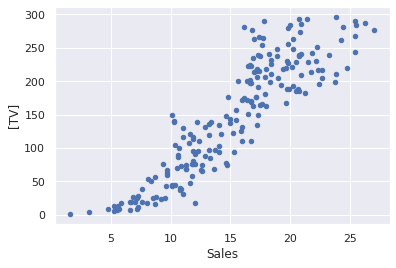

In [ ]:
adv.plot(x='Sales',y=['TV'],kind='scatter')

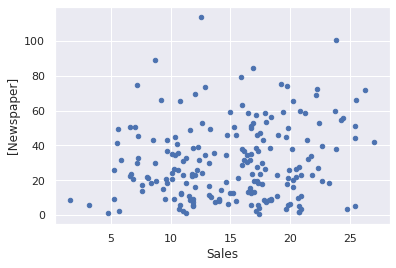

In [ ]:
adv.plot(x='Sales',y=['Newspaper'],kind='scatter')

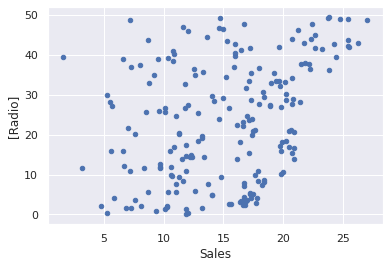

In [ ]:
adv.plot(x='Sales',y=['Radio'],kind='scatter')

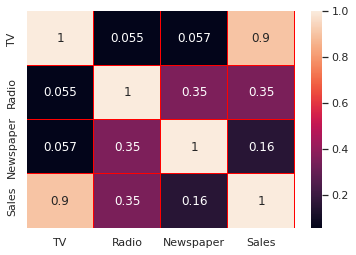

In [ ]:
sns.heatmap(adv.corr(),annot=True,linecolor='red',linewidths=0.1)

In [ ]:
X_ad = adv.drop("Sales", axis=1)
y_ad = adv["Sales"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad,y_ad, train_size=0.8,random_state=42)

In [ ]:
lin = LinearRegression()
lin.fit(X_train_ad,y_train_ad)

LinearRegression()

In [ ]:
y_pred_ad = lin.predict(X_test_ad)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_ad = mean_squared_error(y_test_ad,y_pred_ad)
rmse_ad = mse_ad**0.5
print("MSE:", mse_ad)
print("RMSE:", rmse_ad)

MSE: 2.9077569102710896
RMSE: 1.7052146229349223


**Write Here**

What do you undersend this above (section 4.2)? Write in your own words in this cell.

## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models (for both the dataset, provide seperate comparison). Add as many cells as you need.

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

In [ ]:
# Code Here (Add as many cells as you need)

### **Write Here**

# Part B (Analysis of the Assignment dataset you have collected (Choose One dataset))



## 1. Provide an overview of the Dataset including the Dataset Characteristics and Exploratory Data Analysis, Data Preprocessing, and performance of different models. 

**Write Here**

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need)

### 2.1 Load, View Data and Show Analysis on Rows and Columns 

In [ ]:
# Code Here (Add as many cells as you need)
dff = pd.read_csv('/content/drive/MyDrive/Dhaka_PM2.5_2021_YTD.csv')
dff.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Dhaka,PM2.5 - Principal,2021-01-01 02:00 AM,2021,1,1,2,218.4,268,Very Unhealthy,221.0,UG/M3,1 Hr,Valid
1,Dhaka,PM2.5 - Principal,2021-01-01 03:00 AM,2021,1,1,3,215.2,265,Very Unhealthy,212.0,UG/M3,1 Hr,Valid
2,Dhaka,PM2.5 - Principal,2021-01-01 04:00 AM,2021,1,1,4,197.1,247,Very Unhealthy,179.0,UG/M3,1 Hr,Valid
3,Dhaka,PM2.5 - Principal,2021-01-01 05:00 AM,2021,1,1,5,188.0,238,Very Unhealthy,179.0,UG/M3,1 Hr,Valid
4,Dhaka,PM2.5 - Principal,2021-01-01 06:00 AM,2021,1,1,6,179.2,229,Very Unhealthy,155.0,UG/M3,1 Hr,Valid


In [ ]:
print(dff.to_string())

       Site          Parameter            Date (LT)  Year  Month  Day  Hour  NowCast Conc.  AQI                    AQI Category  Raw Conc. Conc. Unit Duration  QC Name
0     Dhaka  PM2.5 - Principal  2021-01-01 02:00 AM  2021      1    1     2          218.4  268                  Very Unhealthy      221.0      UG/M3     1 Hr    Valid
1     Dhaka  PM2.5 - Principal  2021-01-01 03:00 AM  2021      1    1     3          215.2  265                  Very Unhealthy      212.0      UG/M3     1 Hr    Valid
2     Dhaka  PM2.5 - Principal  2021-01-01 04:00 AM  2021      1    1     4          197.1  247                  Very Unhealthy      179.0      UG/M3     1 Hr    Valid
3     Dhaka  PM2.5 - Principal  2021-01-01 05:00 AM  2021      1    1     5          188.0  238                  Very Unhealthy      179.0      UG/M3     1 Hr    Valid
4     Dhaka  PM2.5 - Principal  2021-01-01 06:00 AM  2021      1    1     6          179.2  229                  Very Unhealthy      155.0      UG/M3     1 Hr  

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8352 entries, 0 to 8351
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           8352 non-null   object 
 1   Parameter      8352 non-null   object 
 2   Date (LT)      8352 non-null   object 
 3   Year           8352 non-null   int64  
 4   Month          8352 non-null   int64  
 5   Day            8352 non-null   int64  
 6   Hour           8352 non-null   int64  
 7   NowCast Conc.  8352 non-null   float64
 8   AQI            8352 non-null   int64  
 9   AQI Category   8320 non-null   object 
 10  Raw Conc.      8352 non-null   float64
 11  Conc. Unit     8352 non-null   object 
 12  Duration       8352 non-null   object 
 13  QC Name        8352 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 913.6+ KB


In [ ]:
dff.describe()

,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
count,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000
mean,2021.000239,6.461925,15.696001,11.501916,94.597689,157.818487,70.421336
std,0.015474,3.471765,8.718026,6.921511,106.850275,106.399638,194.871132
min,2021.000000,1.000000,1.000000,0.000000,-999.000000,-999.000000,-999.000000
25%,2021.000000,3.000000,8.000000,6.000000,34.500000,98.000000,32.000000
50%,2021.000000,6.000000,16.000000,12.000000,73.100000,160.000000,70.000000
75%,2021.000000,10.000000,23.000000,17.000000,141.000000,195.000000,139.000000
max,2022.000000,12.000000,31.000000,23.000000,844.900000,728.000000,927.000000


In [ ]:
dff.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Dhaka,PM2.5 - Principal,2021-01-01 02:00 AM,2021,1,1,2,218.4,268,Very Unhealthy,221.0,UG/M3,1 Hr,Valid
1,Dhaka,PM2.5 - Principal,2021-01-01 03:00 AM,2021,1,1,3,215.2,265,Very Unhealthy,212.0,UG/M3,1 Hr,Valid
2,Dhaka,PM2.5 - Principal,2021-01-01 04:00 AM,2021,1,1,4,197.1,247,Very Unhealthy,179.0,UG/M3,1 Hr,Valid
3,Dhaka,PM2.5 - Principal,2021-01-01 05:00 AM,2021,1,1,5,188.0,238,Very Unhealthy,179.0,UG/M3,1 Hr,Valid
4,Dhaka,PM2.5 - Principal,2021-01-01 06:00 AM,2021,1,1,6,179.2,229,Very Unhealthy,155.0,UG/M3,1 Hr,Valid


In [ ]:
dff.shape

(8352, 14)

In [ ]:
dff.columns

Index(['Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day', 'Hour',
       'NowCast Conc.', 'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit',
       'Duration', 'QC Name'],
      dtype='object')

### 2.2 Data Cleaning









#### Identifying duplicate values


In [ ]:
# Code Here (Add as many cells as you need)
#duplicate values column wise
mis = dff.apply(lambda x: x.duplicated()).sum()
print(mis)
#no of duplicate rows in dataset
print("Duplicate rows = ",len(dff)-len(dff.drop_duplicates()))

#duplicate rows
duplicates = dff[dff.duplicated(keep='first')]
duplicates

Site             8351
Parameter        8351
Date (LT)           0
Year             8350
Month            8340
Day              8321
Hour             8328
NowCast Conc.    5780
AQI              7891
AQI Category     8345
Raw Conc.        7912
Conc. Unit       8351
Duration         8351
QC Name          8348
dtype: int64
Duplicate rows =  0


,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name


#### Identifying missing values


In [ ]:
# Code Here (Add as many cells as you need)
missing = dff.isnull().sum()
print(missing)
print("Total no of missing values in dataset",dff.isnull().sum().sum())

Site              0
Parameter         0
Date (LT)         0
Year              0
Month             0
Day               0
Hour              0
NowCast Conc.     0
AQI               0
AQI Category     32
Raw Conc.         0
Conc. Unit        0
Duration          0
QC Name           0
dtype: int64
Total no of missing values in dataset 32


In [ ]:
# Calculating the percentage of missing values:
#total missing value in percentage
print("Total missing values = {0:.2f} %".format((dff.isnull().sum().sum()/dff.size)*100))
print((dff.isnull().sum()/len(dff))*100)

Total missing values = 0.03 %
Site             0.000000
Parameter        0.000000
Date (LT)        0.000000
Year             0.000000
Month            0.000000
Day              0.000000
Hour             0.000000
NowCast Conc.    0.000000
AQI              0.000000
AQI Category     0.383142
Raw Conc.        0.000000
Conc. Unit       0.000000
Duration         0.000000
QC Name          0.000000
dtype: float64


#### Visualisation of missing data


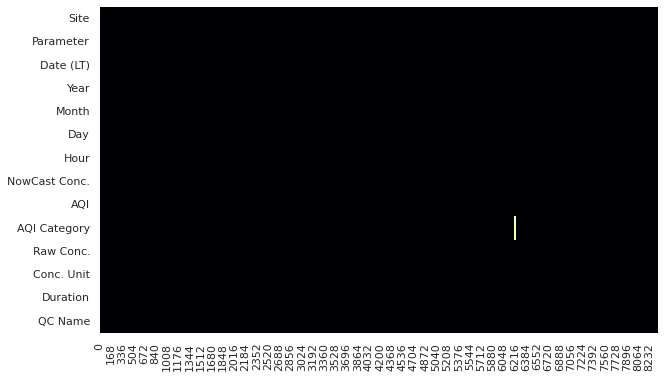

In [ ]:
# Code Here (Add as many cells as you need)
# Detect missing values
# Visualisation
plt.figure(figsize=(10,6))
sns.heatmap(dff.isna().transpose(),cmap="inferno",cbar_kws={'label': 'Missing Data'},cbar=False)

#### Dealing with missing values (How would you deal with missing values?) (Columns with missing data)



1.   Do analysis using plots

2.   Provide an appropriate discussion




In [ ]:
# Code Here (Add as many cells as you need)
dff[dff['AQI Category'].isnull()]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
504,Dhaka,PM2.5 - Principal,2021-01-22 02:00 PM,2021,1,22,14,-999.0,-999,NaN,205.0,UG/M3,1 Hr,Valid
576,Dhaka,PM2.5 - Principal,2021-01-25 04:00 PM,2021,1,25,16,-999.0,-999,NaN,128.0,UG/M3,1 Hr,Valid
2303,Dhaka,PM2.5 - Principal,2021-04-11 11:00 AM,2021,4,11,11,-999.0,-999,NaN,101.0,UG/M3,1 Hr,Valid
3112,Dhaka,PM2.5 - Principal,2021-05-15 04:00 AM,2021,5,15,4,-999.0,-999,NaN,406.0,UG/M3,1 Hr,Invalid
6215,Dhaka,PM2.5 - Principal,2021-09-21 01:00 PM,2021,9,21,13,-999.0,-999,NaN,-7.0,UG/M3,1 Hr,Invalid
6216,Dhaka,PM2.5 - Principal,2021-09-21 02:00 PM,2021,9,21,14,-999.0,-999,NaN,-5.0,UG/M3,1 Hr,Invalid
6217,Dhaka,PM2.5 - Principal,2021-09-21 03:00 PM,2021,9,21,15,-999.0,-999,NaN,-6.0,UG/M3,1 Hr,Invalid
6218,Dhaka,PM2.5 - Principal,2021-09-21 04:00 PM,2021,9,21,16,-999.0,-999,NaN,-9.0,UG/M3,1 Hr,Invalid
6219,Dhaka,PM2.5 - Principal,2021-09-21 05:00 PM,2021,9,21,17,-999.0,-999,NaN,-6.0,UG/M3,1 Hr,Invalid
6220,Dhaka,PM2.5 - Principal,2021-09-21 06:00 PM,2021,9,21,18,-999.0,-999,NaN,-4.0,UG/M3,1 Hr,Invalid


In [ ]:
dff.corr()

,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
Year,1.000000,-0.024350,-0.026090,-0.024602,0.005056,0.004536,0.004931
Month,-0.024350,1.000000,0.006349,-0.001377,-0.231607,-0.213812,-0.080033
Day,-0.026090,0.006349,1.000000,-0.000912,0.001506,-0.025674,0.014463
Hour,-0.024602,-0.001377,-0.000912,1.000000,-0.106822,-0.090499,0.136726
NowCast Conc.,0.005056,-0.231607,0.001506,-0.106822,1.000000,0.985269,0.354209
AQI,0.004536,-0.213812,-0.025674,-0.090499,0.985269,1.000000,0.329310
Raw Conc.,0.004931,-0.080033,0.014463,0.136726,0.354209,0.329310,1.000000


In [ ]:
dff['AQI Category'].value_counts()

Unhealthy                         3034
Moderate                          1872
Very Unhealthy                    1432
Unhealthy for Sensitive Groups    1243
Hazardous                          482
Good                               257
Name: AQI Category, dtype: int64

In [ ]:
dff['NowCast Conc.'].value_counts()

-999.0    32
 29.8     20
 31.7     18
 22.6     17
 34.0     17
          ..
 462.5     1
 347.7     1
 139.3     1
 160.1     1
 127.7     1
Name: NowCast Conc., Length: 2572, dtype: int64

In [ ]:
dff[dff['Raw Conc.']==-999]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
503,Dhaka,PM2.5 - Principal,2021-01-22 01:00 AM,2021,1,22,1,324.2,374,Hazardous,-999.0,UG/M3,1 Hr,Missing
575,Dhaka,PM2.5 - Principal,2021-01-25 01:00 PM,2021,1,25,13,131.9,190,Unhealthy,-999.0,UG/M3,1 Hr,Missing
586,Dhaka,PM2.5 - Principal,2021-01-26 02:00 AM,2021,1,26,2,333.9,384,Hazardous,-999.0,UG/M3,1 Hr,Missing
1186,Dhaka,PM2.5 - Principal,2021-02-20 02:00 AM,2021,2,20,2,207.6,258,Very Unhealthy,-999.0,UG/M3,1 Hr,Missing
1210,Dhaka,PM2.5 - Principal,2021-02-21 02:00 AM,2021,2,21,2,236.8,287,Very Unhealthy,-999.0,UG/M3,1 Hr,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6135,Dhaka,PM2.5 - Principal,2021-09-18 03:00 AM,2021,9,18,3,42.6,118,Unhealthy for Sensitive Groups,-999.0,UG/M3,1 Hr,Missing
6159,Dhaka,PM2.5 - Principal,2021-09-19 03:00 AM,2021,9,19,3,12.0,50,Good,-999.0,UG/M3,1 Hr,Missing
6183,Dhaka,PM2.5 - Principal,2021-09-20 03:00 AM,2021,9,20,3,29.9,88,Moderate,-999.0,UG/M3,1 Hr,Missing
6207,Dhaka,PM2.5 - Principal,2021-09-21 03:00 AM,2021,9,21,3,34.7,99,Moderate,-999.0,UG/M3,1 Hr,Missing


### 2.3 Analysing Patterns using Visualisations

#### Visualization of column correlation. Also, plot Heat Map

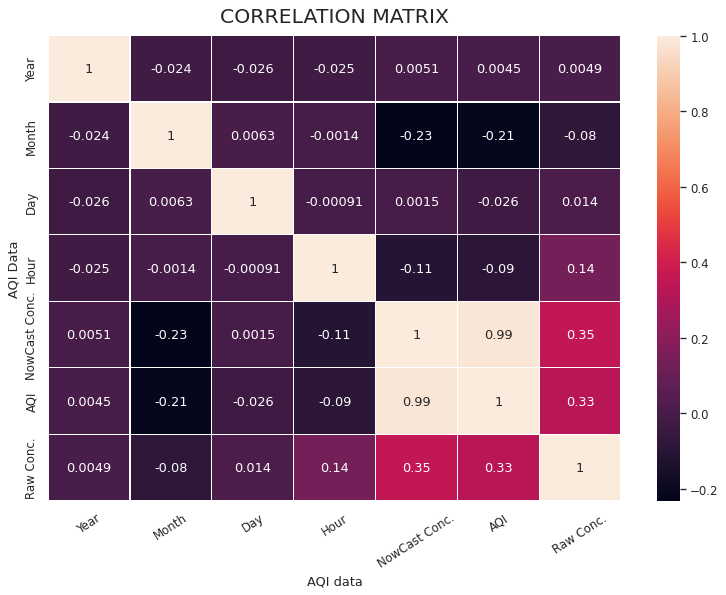

In [ ]:
# Code Here (Add as many cells as you need)
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(dff.corr(), linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('AQI data')
plt.ylabel('AQI Data')
plt.xticks(rotation=33)
plt.show()

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

> Indented block



In [ ]:
sns.pairplot(data=dff)

<Figure size 1080x2016 with 0 Axes>

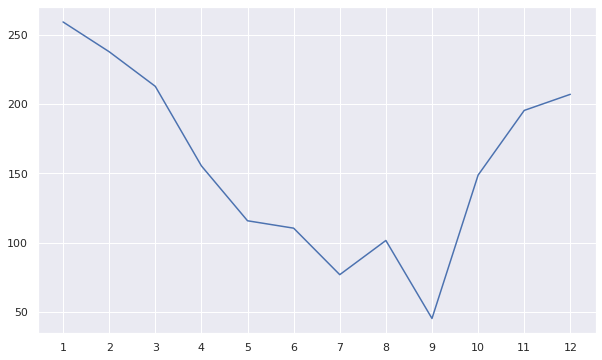

In [ ]:
# Code Here (Add as many cells as you need)
months = [1,2,3,4,5,6,7,8,9,10,11,12]
labels = ['1','2','3','4','5','6','7','8','9','10','11','12']
mean_AQI=[]
fig = plt.figure(figsize=(15,28))
for month in months:
    dff1 = dff[dff['Month']==month]
    data_by_month = dff1['AQI'].mean()
    mean_AQI.append(data_by_month)
plt.figure(figsize=(10,6))
plt.plot(months,mean_AQI)
plt.xticks(months, labels)
plt.show()

<Figure size 1080x2016 with 0 Axes>

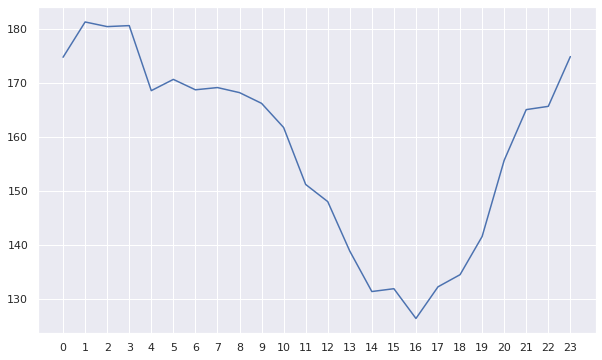

In [ ]:
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
labels = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
mean_AQI_hr=[]
fig = plt.figure(figsize=(15,28))
for hr in hours:
    dff1 = dff[dff['Hour']==hr]
    data_by_hour = dff1['AQI'].mean()
    mean_AQI_hr.append(data_by_hour)
plt.figure(figsize=(10,6))
plt.plot(hours,mean_AQI_hr)
plt.xticks(hours, labels)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


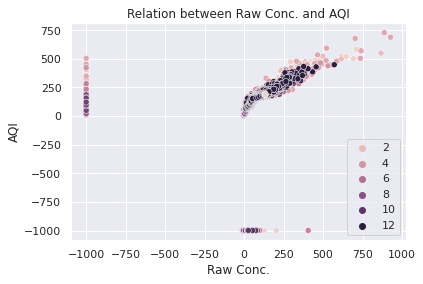

In [ ]:
sns.scatterplot('Raw Conc.', 'AQI', hue='Month', data=dff)
plt.title('Relation between Raw Conc. and AQI')
plt.xlabel('Raw Conc.')
plt.ylabel('AQI')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


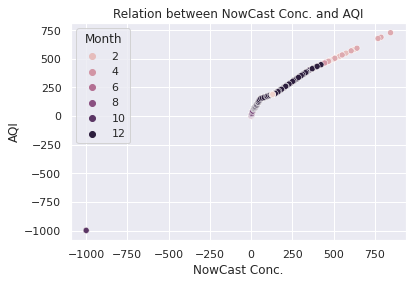

In [ ]:
sns.scatterplot('NowCast Conc.', 'AQI', hue='Month', data=dff)
plt.title('Relation between NowCast Conc. and AQI')
plt.xlabel('NowCast Conc.')
plt.ylabel('AQI')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


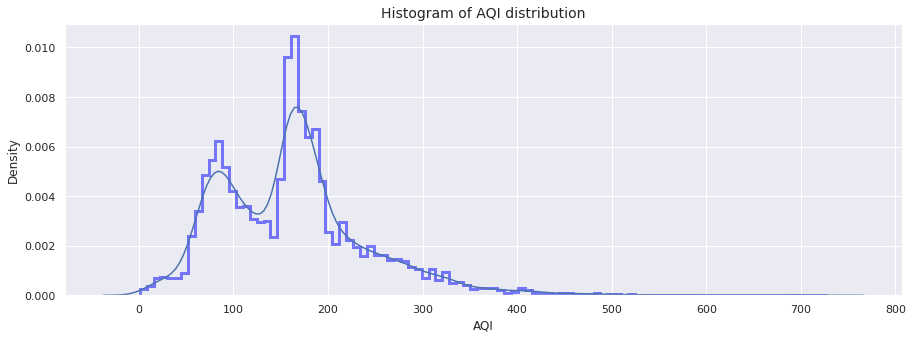

In [ ]:
plt.figure(figsize = (15,5))
dff2=dff[dff['AQI']>0]
plot = sns.distplot(dff2['AQI'],bins = 100, hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 0.5, "color": "blue"});
plot.set_title('Histogram of AQI distribution', fontsize = 14); 



#### Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



In [ ]:
dff['AQI Category'].value_counts()

Unhealthy                         3034
Moderate                          1872
Very Unhealthy                    1432
Unhealthy for Sensitive Groups    1243
Hazardous                          482
Good                               257
Name: AQI Category, dtype: int64

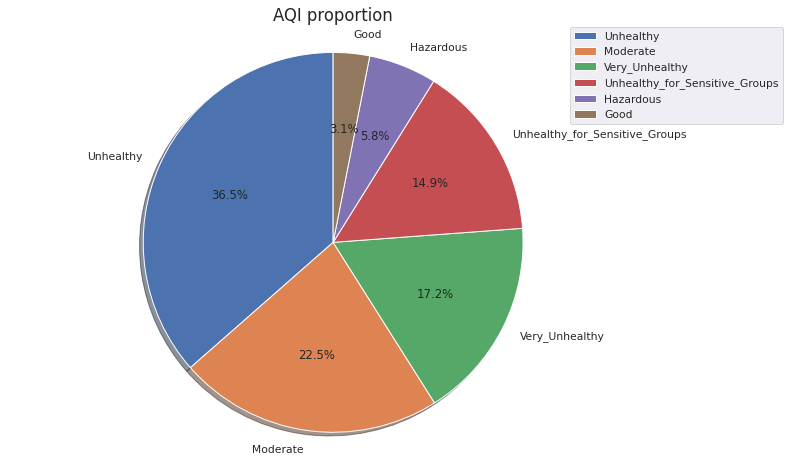

[3034, 1872, 1432, 1243, 482, 257]


In [ ]:
# Code Here (Add as many cells as you need)
Unhealthy = (dff['AQI Category'] == 'Unhealthy').sum()
Moderate = (dff['AQI Category'] == 'Moderate').sum()
Very_Unhealthy = (dff['AQI Category'] == 'Very Unhealthy').sum()
Unhealthy_for_Sensitive_Groups = (dff['AQI Category'] == 'Unhealthy for Sensitive Groups').sum()
Hazardous = (dff['AQI Category'] == 'Hazardous').sum()
Good = (dff['AQI Category'] == 'Good').sum()
proportions = [Unhealthy,Moderate,Very_Unhealthy,Unhealthy_for_Sensitive_Groups,Hazardous,Good]

plt.figure(figsize=(12,8), dpi=70)
plt.pie(proportions, data=dff, labels= ['Unhealthy','Moderate','Very_Unhealthy','Unhealthy_for_Sensitive_Groups','Hazardous','Good'], startangle=90, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("AQI proportion", size=17, pad=13)
plt.legend(loc='right',bbox_to_anchor=(1.2,0.9))
plt.show()
print(proportions)

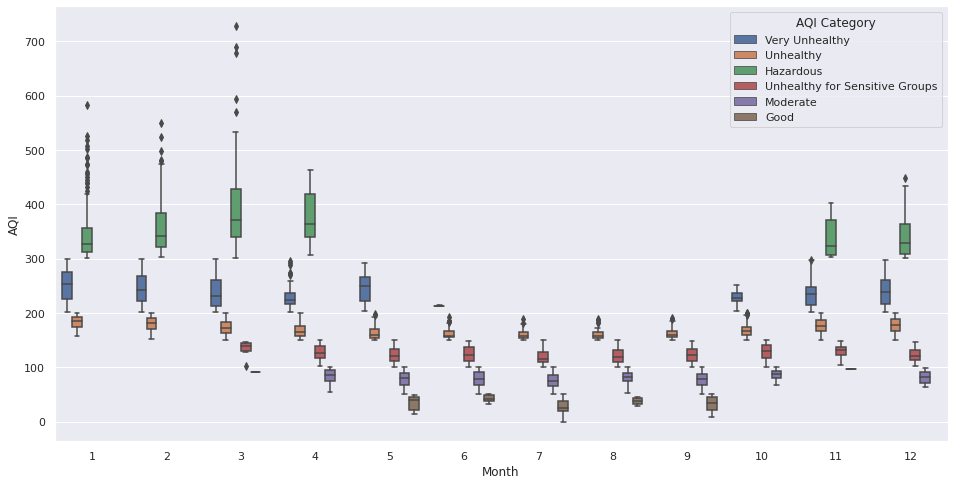

In [ ]:
sns.set(rc={"figure.figsize":(16, 8)})
sns.boxplot(x='Month',y='AQI', hue = 'AQI Category', data=dff)

## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

In [ ]:
# Code Here (Add as many cells as you need)
#no duplicate rows
dff[dff['AQI Category'].isnull()]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
504,Dhaka,PM2.5 - Principal,2021-01-22 02:00 PM,2021,1,22,14,-999.0,-999,NaN,205.0,UG/M3,1 Hr,Valid
576,Dhaka,PM2.5 - Principal,2021-01-25 04:00 PM,2021,1,25,16,-999.0,-999,NaN,128.0,UG/M3,1 Hr,Valid
2303,Dhaka,PM2.5 - Principal,2021-04-11 11:00 AM,2021,4,11,11,-999.0,-999,NaN,101.0,UG/M3,1 Hr,Valid
3112,Dhaka,PM2.5 - Principal,2021-05-15 04:00 AM,2021,5,15,4,-999.0,-999,NaN,406.0,UG/M3,1 Hr,Invalid
6215,Dhaka,PM2.5 - Principal,2021-09-21 01:00 PM,2021,9,21,13,-999.0,-999,NaN,-7.0,UG/M3,1 Hr,Invalid
6216,Dhaka,PM2.5 - Principal,2021-09-21 02:00 PM,2021,9,21,14,-999.0,-999,NaN,-5.0,UG/M3,1 Hr,Invalid
6217,Dhaka,PM2.5 - Principal,2021-09-21 03:00 PM,2021,9,21,15,-999.0,-999,NaN,-6.0,UG/M3,1 Hr,Invalid
6218,Dhaka,PM2.5 - Principal,2021-09-21 04:00 PM,2021,9,21,16,-999.0,-999,NaN,-9.0,UG/M3,1 Hr,Invalid
6219,Dhaka,PM2.5 - Principal,2021-09-21 05:00 PM,2021,9,21,17,-999.0,-999,NaN,-6.0,UG/M3,1 Hr,Invalid
6220,Dhaka,PM2.5 - Principal,2021-09-21 06:00 PM,2021,9,21,18,-999.0,-999,NaN,-4.0,UG/M3,1 Hr,Invalid


In [ ]:
dff['NowCast Conc.'].value_counts()

-999.0    32
 29.8     20
 31.7     18
 22.6     17
 34.0     17
          ..
 462.5     1
 347.7     1
 139.3     1
 160.1     1
 127.7     1
Name: NowCast Conc., Length: 2572, dtype: int64

In [ ]:
dff["AQI Category"] = dff["AQI Category"].astype('category')
dff["AQI Category"] = dff["AQI Category"].cat.codes
indexAQ = dff[ (dff['AQI Category'] == -1)].index
dff.drop(indexAQ , inplace=True)


In [ ]:
dff['NowCast Conc.'].value_counts()

29.8     20
31.7     18
34.0     17
22.6     17
30.8     16
         ..
462.5     1
347.7     1
139.3     1
160.1     1
127.7     1
Name: NowCast Conc., Length: 2571, dtype: int64

In [ ]:
dff[dff['AQI Category'].isnull()]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name


In [ ]:
dff[dff['Raw Conc.']==-999]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
503,Dhaka,PM2.5 - Principal,2021-01-22 01:00 AM,2021,1,22,1,324.2,374,1,-999.0,UG/M3,1 Hr,Missing
575,Dhaka,PM2.5 - Principal,2021-01-25 01:00 PM,2021,1,25,13,131.9,190,3,-999.0,UG/M3,1 Hr,Missing
586,Dhaka,PM2.5 - Principal,2021-01-26 02:00 AM,2021,1,26,2,333.9,384,1,-999.0,UG/M3,1 Hr,Missing
1186,Dhaka,PM2.5 - Principal,2021-02-20 02:00 AM,2021,2,20,2,207.6,258,5,-999.0,UG/M3,1 Hr,Missing
1210,Dhaka,PM2.5 - Principal,2021-02-21 02:00 AM,2021,2,21,2,236.8,287,5,-999.0,UG/M3,1 Hr,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6135,Dhaka,PM2.5 - Principal,2021-09-18 03:00 AM,2021,9,18,3,42.6,118,4,-999.0,UG/M3,1 Hr,Missing
6159,Dhaka,PM2.5 - Principal,2021-09-19 03:00 AM,2021,9,19,3,12.0,50,0,-999.0,UG/M3,1 Hr,Missing
6183,Dhaka,PM2.5 - Principal,2021-09-20 03:00 AM,2021,9,20,3,29.9,88,2,-999.0,UG/M3,1 Hr,Missing
6207,Dhaka,PM2.5 - Principal,2021-09-21 03:00 AM,2021,9,21,3,34.7,99,2,-999.0,UG/M3,1 Hr,Missing


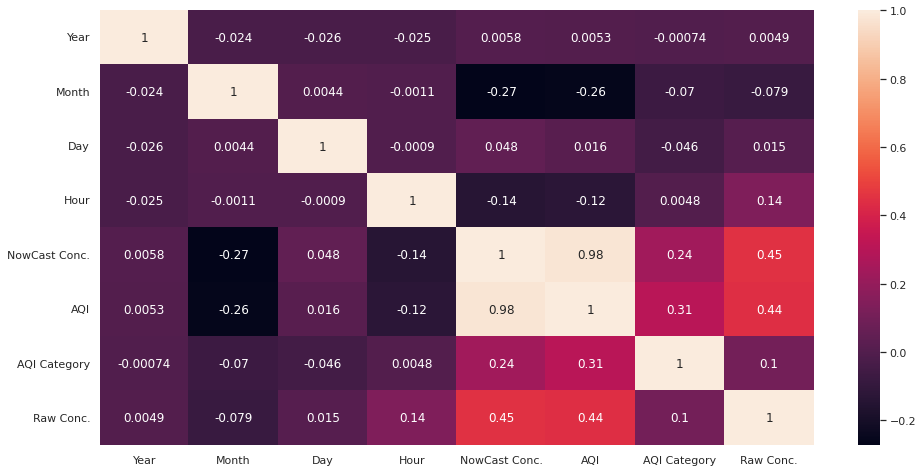

In [ ]:
sns.heatmap(dff.corr(),annot=True)

In [ ]:
raw_cast = dff[dff['Raw Conc.']!=-999]
me = raw_cast['Raw Conc.'].mean()
print(me)

99.29276721797088


In [ ]:
dff["Raw Conc."].replace(-999, me, inplace=True)

In [ ]:
dff[dff['Raw Conc.']==-999]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name


In [ ]:
dff.drop(columns=['Site','Parameter','Year','Conc. Unit','Duration','QC Name'],inplace=True)

In [ ]:
dff.head()

,Date (LT),Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
0,2021-01-01 02:00 AM,1,1,2,218.4,268,5,221.0
1,2021-01-01 03:00 AM,1,1,3,215.2,265,5,212.0
2,2021-01-01 04:00 AM,1,1,4,197.1,247,5,179.0
3,2021-01-01 05:00 AM,1,1,5,188.0,238,5,179.0
4,2021-01-01 06:00 AM,1,1,6,179.2,229,5,155.0


In [ ]:
col = dff['Date (LT)']
col = pd.to_datetime(col)
dff['Date'] = col.dt.date


In [ ]:
dff.drop(columns=['Date (LT)'],inplace=True)

In [ ]:
dff.head()

,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Date
0,1,1,2,218.4,268,5,221.0,2021-01-01
1,1,1,3,215.2,265,5,212.0,2021-01-01
2,1,1,4,197.1,247,5,179.0,2021-01-01
3,1,1,5,188.0,238,5,179.0,2021-01-01
4,1,1,6,179.2,229,5,155.0,2021-01-01


In [ ]:
dff.corr()

,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
Month,1.000000,0.004371,-0.001132,-0.272942,-0.259701,-0.069624,-0.256088
Day,0.004371,1.000000,-0.000905,0.048077,0.016389,-0.045903,0.044846
Hour,-0.001132,-0.000905,1.000000,-0.140105,-0.124568,0.004846,-0.112600
NowCast Conc.,-0.272942,0.048077,-0.140105,1.000000,0.976581,0.236334,0.963858
AQI,-0.259701,0.016389,-0.124568,0.976581,1.000000,0.308513,0.940190
AQI Category,-0.069624,-0.045903,0.004846,0.236334,0.308513,1.000000,0.223833
Raw Conc.,-0.256088,0.044846,-0.112600,0.963858,0.940190,0.223833,1.000000


In [ ]:
X = dff.drop(["AQI","Date"], axis=1)
y = dff["AQI"]

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y, train_size=0.8)

### **Write Here**

## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

In [ ]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_tr,y_tr)

NameError: ignored

In [ ]:
y_pr = model.predict(X_te)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_svr = mean_squared_error(y_te,y_pr)
rmse_svr = mse_svr**0.5
print("MSE:", mse_svr)
print("RMSE:", rmse_svr)

In [ ]:
# Code Here (Add as many cells as you need)

### **Write Here**

## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models. (Add as many cells as you need)

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

In [ ]:
# Code Here (Add as many cells as you need)

### **Write Here**